# Report - An analysis of the key features predicting movie box office success

#### Introduction

Movie production is a multi-billion dollar industry with hundreds of yearly releases with large variations in budgets and box office revenues. These factores range from the budget, to the genre to the stars cast in these movies. To understand these factors and their combined influence on revenue could save the industry millions of dollars per year and curtail expectations where necessary once the movie hits release date. This report analyses these individual factores and combines them to perform multiple linear regression and classification to predict the box office success of movies.

#### Aims

This report aims to asses all the features within this dataset to assertain if any features impact the box office return in a meaningful capacity.

To employ the use of NLP techniques with machine learning algorithms to predict the success of a movie based upon its storyline description. 

To create a model using linear regression to predict a films box office revenue given a set of independant variables.

To create a movie recommendation model using a pre-trained model from Keras or Tensorflow.

#### Objectives

1. Identify correlations between the many features of the dataset in relation to the box office revenue.
2. Examine, capture and process outliers in an appropriate manner.
3. Perform unittests and pytests on dataframe and functions as required
4. Confirm all features in the dataset are in a usuable and statistically correct state.
5. Use natural language processing to create a movie classifier based upon revenue.
6. Employ linear regression to predict a movies box office success using a combination of variables.
7. Use a pre-trained model to build a movie recommendation system.

Project timescale - To be completed by 06.08.21 at 14:00

## Importing & Examining the Dataset

In [139]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import unittest
import ipytest
import datatest as dt
%matplotlib inline

The first step taken into this analysis shall begin by an examination of the processed web scraped IMDB file created in the first part of the coursework [1] (Papanaga, 2021). Full reference list may be found at the bottom of this report.

In [140]:
# importing the proccesed csv file outputed from the first half of the coursework
movies_df = pd.read_csv('movies_dataframe.csv')

This file has already been processed with missing value removed, data types in the correct format and the 'storyline' column processed and prepared for analysis.

In [141]:
movies_df.head()

,title,year,duration,genre,director,rating,votes,metascore,star1,star2,star3,storyline,PG,budget,box_office,net_profit,storyline_processed
0,Blade Runner,1982,1h 57min,Action,David Webb Peoples,8.1,709.0,84.0,Harrison Ford,Rutger Hauer,Sean Young,early twentyfirst century tyrell corporation c...,15,28000000,41676878,13676878,earli twentyfirst centuri tyrel corpor call ne...
1,Slumdog Millionaire,2008,2h,Drama,Simon Beaufoy,8.0,811.0,84.0,Dev Patel,Freida Pinto,Saurabh Shukla,story jamal malik 18 yearold orphan slums mumb...,15A,15000000,378410542,363410542,stori jamal malik 18 yearold orphan slum mumba...
2,The Untouchables,1987,1h 59min,Crime,Brian De Palma,7.9,289.0,79.0,Kevin Costner,Sean Connery,Robert De Niro,building empire bootleg alcohol legendary crim...,15,25000000,76270454,51270454,build empir bootleg alcohol legendari crime bo...
3,Edward Scissorhands,1990,1h 45min,Drama,Caroline Thompson,7.9,455.0,74.0,Johnny Depp,Winona Ryder,Dianne Wiest,castle high top hill lives inventors greatest ...,PG,20000000,86024005,66024005,castl high top hill live inventor greatest cre...
4,The Commitments,1991,1h 58min,Comedy,Dick Clement,7.6,34.0,73.0,Robert Arkins,Michael Aherne,Angeline Ball,funny musical occasionally dramatic story tumu...,15,12000000,14919570,2919570,funni music occasion dramat stori tumultu rise...


### Is the Data Fit For Purpose?

This dataset has already been processed in the first part of the coursework and as such I am happy with the data types for all features, bar one. The duration 'column' in its current state is unusable, being of object data type it cannot be used for any statistical inference and as such needs to be transformed into an integer format.

In [142]:
# checking data types for each feature
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                4802 non-null   object 
 1   year                 4802 non-null   int64  
 2   duration             4802 non-null   object 
 3   genre                4802 non-null   object 
 4   director             4802 non-null   object 
 5   rating               4802 non-null   float64
 6   votes                4802 non-null   float64
 7   metascore            4802 non-null   float64
 8   star1                4802 non-null   object 
 9   star2                4802 non-null   object 
 10  star3                4802 non-null   object 
 11  storyline            4802 non-null   object 
 12  PG                   4802 non-null   object 
 13  budget               4802 non-null   int64  
 14  box_office           4802 non-null   int64  
 15  net_profit           4802 non-null   i

In [143]:
movies_df['duration'].head()

0    1h 57min
1          2h
2    1h 59min
3    1h 45min
4    1h 58min
Name: duration, dtype: object

In order to process the feature I will have to split each part of the 'duration' string into hours and minutes, process them into the desired format and add both pandas series back together. Finally the orginal 'duration' column will be replaced with the new combined minutes runtime for each movie.

In [144]:
# remove the letter h from the duration column
remove_h = movies_df['duration'].str.replace(r'h','')

# extract the first character from the entry, which is the hour
hours = remove_h.str.get(0)

# convert data type from str to int
hours = hours.astype(int)

# multiply every value in the column by 60 to get the minutes runtime
hours = hours.multiply(60)

# examining the result
print(hours.head())

# checking the lenght of the column ensuring that it is the correct lenght and matches the original data
print('\nLenght of the "hours" column:', len(hours))

0     60
1    120
2     60
3     60
4     60
Name: duration, dtype: int32

Lenght of the "hours" column: 4802


Processing the minutes part of the duration is slightly more complicated due to empty entries in the original dataset which must be filled before the column can be coverted to integer type. The empty entries signify that a movies was for example exactly two hours and as such no minutes are recorded.

In this case I decided to replace missing values with 0 as this simplifies the later addition of the two series.

In [145]:
# remove the 'min' string from the column
remove_min = movies_df['duration'].str.replace(r'\D+',' ')

# select past the first character in the column as the first character represent the hour
minutes = remove_min.str[1:]

# strip all whitespace from the series
minutes = minutes.str.strip()

# replace empty entries with 0
minutes = minutes.replace('', 0)

# convert the column to integer data type
minutes = minutes.astype(int)

# examining the result
print(minutes.head())

# checking the lenght of the column ensuring that it is the correct lenght and matches the original data
print('\nLenght of the "hours" column:', len(minutes))

0    57
1     0
2    59
3    45
4    58
Name: duration, dtype: int32

Lenght of the "hours" column: 4802


Now that both series have been processed and converted into integer data types we can add the minutes together to get the total film runtime.

In [146]:
# initialising variable
duration_minutes = 0                               

# adding both hours and minutes series together
duration_minutes = minutes + hours

# examining results
duration_minutes.head()

0    117
1    120
2    119
3    105
4    118
Name: duration, dtype: int32

Finally I will replace the existing 'duration' column with the new integer minutes column in the original dataframe.

I have pondered whether I should use a copy of the original dataframe however I do not see any further use for the original object data type and have decided to remove it completely.

In [147]:
# removing the original 'duration' column from the dataframe
movies_df.drop(columns='duration', inplace=True)

In [148]:
# appending new duration column to dataframe, in the same position as the original column
movies_df.insert(3, 'duration', value=duration_minutes)

In [149]:
# examining results
movies_df.head()

,title,year,genre,duration,director,rating,votes,metascore,star1,star2,star3,storyline,PG,budget,box_office,net_profit,storyline_processed
0,Blade Runner,1982,Action,117,David Webb Peoples,8.1,709.0,84.0,Harrison Ford,Rutger Hauer,Sean Young,early twentyfirst century tyrell corporation c...,15,28000000,41676878,13676878,earli twentyfirst centuri tyrel corpor call ne...
1,Slumdog Millionaire,2008,Drama,120,Simon Beaufoy,8.0,811.0,84.0,Dev Patel,Freida Pinto,Saurabh Shukla,story jamal malik 18 yearold orphan slums mumb...,15A,15000000,378410542,363410542,stori jamal malik 18 yearold orphan slum mumba...
2,The Untouchables,1987,Crime,119,Brian De Palma,7.9,289.0,79.0,Kevin Costner,Sean Connery,Robert De Niro,building empire bootleg alcohol legendary crim...,15,25000000,76270454,51270454,build empir bootleg alcohol legendari crime bo...
3,Edward Scissorhands,1990,Drama,105,Caroline Thompson,7.9,455.0,74.0,Johnny Depp,Winona Ryder,Dianne Wiest,castle high top hill lives inventors greatest ...,PG,20000000,86024005,66024005,castl high top hill live inventor greatest cre...
4,The Commitments,1991,Comedy,118,Dick Clement,7.6,34.0,73.0,Robert Arkins,Michael Aherne,Angeline Ball,funny musical occasionally dramatic story tumu...,15,12000000,14919570,2919570,funni music occasion dramat stori tumultu rise...


Examining the data types of the dataframe we now have the duration column in the correct format.

In [150]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                4802 non-null   object 
 1   year                 4802 non-null   int64  
 2   genre                4802 non-null   object 
 3   duration             4802 non-null   int32  
 4   director             4802 non-null   object 
 5   rating               4802 non-null   float64
 6   votes                4802 non-null   float64
 7   metascore            4802 non-null   float64
 8   star1                4802 non-null   object 
 9   star2                4802 non-null   object 
 10  star3                4802 non-null   object 
 11  storyline            4802 non-null   object 
 12  PG                   4802 non-null   object 
 13  budget               4802 non-null   int64  
 14  box_office           4802 non-null   int64  
 15  net_profit           4802 non-null   i

### Unittesting the Dataframe Features 

The features which have been manipulated and processed in the first half of the coursework as well as this coursework will now be tested using unittests to ensure they are of correct data type before continuing on with further data manipulation and analysis.

In [151]:
class test_movies_df(dt.DataTestCase):
    
    """
    This class tests the many variables in the dataset which have been manipulated 
    in some capacity, ensuring these features are in their correct state.
    """

    def test_PG(self):
        self.assertValidSuperset(movies_df['PG'],
                                {'15', '15A', 'PG-13', 'PG', 'G', 'Not Rated', 'M', 'Approved'},)

    def test_year(self):
        self.assertValid(movies_df['year'], int)

    def test_runtime(self):
        self.assertValid(movies_df['duration'], int)
        
    def test_budget(self):
        self.assertValid(movies_df['budget'], int)
        
    def test_box_office(self):
        self.assertValid(movies_df['box_office'], int)
        
    def test_net_profit(self):
        self.assertValid(movies_df['net_profit'], int)
        
    def test_rating(self):
        self.assertValid(movies_df['rating'], float)
        
    def test_votes(self):
        self.assertValid(movies_df['votes'], float)
        
    def test_metascore(self):
        self.assertValid(movies_df['metascore'], float)


unittest.main(argv=['ignored', '-v'], exit=False)

test_PG (__main__.test_movies_df) ... C:\ProgramData\Anaconda3\lib\site-packages\datatest\case.py:48: UserWarning: subset and superset warning:

    have been inverted after datatest 0.9.6. Make sure you are using
    these methods correctly. See documentation for details:

        https://datatest.readthedocs.io/en/stable/reference/datatest-core.html#datatest.validate.subset

    To disable this warning use:

        import warnings
        warnings.filterwarnings('ignore', message='subset and superset warning')

    If you are using pytest, you can disable warnings by putting the following
    line at the top of your script:

        pytestmark = pytest.mark.filterwarnings('ignore:subset and superset warning')

    This warning is temporary--it will be removed from future versions
    of datatest.

Source:
  function(*args, **kwds)
ok
test_box_office (__main__.test_movies_df) ... ok
test_budget (__main__.test_movies_df) ... ok
test_metascore (__main__.test_movies_df) ... ok
test_net_

### Duplication Check - Column Wise

While the dataset was checked for duplicates in the first part of the coursework, it has come to may attention that individual columns were left unchecked and may contain duplicates in certain features which were previously missed.

This will now be checked using a for loop to sum the duplicates column wise.

In [152]:
# iterating through the columns and printing duplicate entries
for column in movies_df.columns:
    print(column, '- No. of duplicate entries:', movies_df[column].duplicated().sum())

title - No. of duplicate entries: 94
year - No. of duplicate entries: 4714
genre - No. of duplicate entries: 4783
duration - No. of duplicate entries: 4669
director - No. of duplicate entries: 1896
rating - No. of duplicate entries: 4728
votes - No. of duplicate entries: 4203
metascore - No. of duplicate entries: 4707
star1 - No. of duplicate entries: 3101
star2 - No. of duplicate entries: 2424
star3 - No. of duplicate entries: 1846
storyline - No. of duplicate entries: 0
PG - No. of duplicate entries: 4778
budget - No. of duplicate entries: 4343
box_office - No. of duplicate entries: 1
net_profit - No. of duplicate entries: 0
storyline_processed - No. of duplicate entries: 0


While the majority of columns are expected to contain duplicates, the movie titles duplication are a cause of concern and will be examined in more detail.\

In [153]:
# examining all movie titles which are duplciated
movies_df[movies_df['title'].duplicated()].head()

,title,year,genre,duration,director,rating,votes,metascore,star1,star2,star3,storyline,PG,budget,box_office,net_profit,storyline_processed
555,Pete's Dragon,1977,Animation,128,Malcolm Marmorstein,6.4,23.0,46.0,Sean Marshall,Helen Reddy,Jim Dale,early20thcentury new england 9yearold orphan p...,G,10000000,39588000,29588000,early20thcenturi new england 9yearold orphan p...
557,The Three Musketeers,1993,Action,105,David Loughery,6.4,52.0,43.0,Charlie Sheen,Kiefer Sutherland,Chris O'Donnell,three best disbanded musketeers athos kiefer s...,PG,30000000,53898845,23898845,three best disband musket atho kiefer sutherla...
614,Annie,1982,Comedy,126,John Huston,6.6,41.0,39.0,Aileen Quinn,Albert Finney,Carol Burnett,depths 1930s annie aileen quinn fiery young or...,G,50000000,57063861,7063861,depth 1930 anni aileen quinn fieri young orpha...
664,Hellboy,2004,Action,122,Peter Briggs,6.8,311.0,72.0,Ron Perlman,Doug Jones,Selma Blair,end world war ii nazi officers karl ruprecht k...,12PG,66000000,99378985,33378985,end world war ii nazi offic karl ruprecht kroe...
674,Conan the Barbarian,1982,Action,129,John Milius,6.9,140.0,43.0,Arnold Schwarzenegger,James Earl Jones,Max von Sydow,beyond mists time witnessed brutal death black...,R,20000000,68851475,48851475,beyond mist time wit brutal death blacksmith f...


The list above is too long to be practically examined in the cell and as such I will take an individual example from the list above and observe the duplication.

In [154]:
# observing duplicate title
movies_df[movies_df['title'] == "Pete's Dragon"]

,title,year,genre,duration,director,rating,votes,metascore,star1,star2,star3,storyline,PG,budget,box_office,net_profit,storyline_processed
42,Pete's Dragon,2016,Action,102,David Lowery,6.7,55.0,71.0,Bryce Dallas Howard,Robert Redford,Oakes Fegley,young boy pete found forest hes living six yea...,PG,65000000,143695338,78695338,young boy pete found forest he live six year a...
555,Pete's Dragon,1977,Animation,128,Malcolm Marmorstein,6.4,23.0,46.0,Sean Marshall,Helen Reddy,Jim Dale,early20thcentury new england 9yearold orphan p...,G,10000000,39588000,29588000,early20thcenturi new england 9yearold orphan p...


It appears that this dataset contains multiple re-launched movies, interestingly with different genres for many, having performed spot checks to verify this. As these movies are techincally not exact copies of one another with differing ratings and budgets I will keep them in the dataset for analysis.

### Adjusting For Inflation

This dataset consists of a number of decades ranging from the 1930's to the present day and as such the budget and box office variables must be adjusted to a standart scale of measurement. This has come to my attention during my analysis of these variables, visible by a large difference between in budgets over the decades to the point of raising alarms.

First of all I will need the relevant inflation data for the US dollar, which can be found on the officialdata.org [2] website. While there is an option to download the inflationary data into a csv file, upon further inspection I have realised that inflation percentages are rounded and given the large numbers we are working with I prefer to retain as much accuracy as possible. While on the topic of accuracy I am well aware that this manipulation of data will be innacurate to a degree, however it will still provide a cleaner picture of the underlying trends between budget and box office.

I have decided to scrape the necessary data through the use of a spider which can easily and effectively download and store the information into a csv file. This csv file is included with the report for ethical reasons, as to not barrage the webiste with multiple requests.

In [155]:
import scrapy
from scrapy.crawler import CrawlerProcess

# creating the spider class
class inflation_crawler(scrapy.Spider):
    name = 'inflation'
    
    # enter the url for the website to be scraped
    def start_requests(self):
        urls = ['https://www.officialdata.org/us/inflation/1800?amount=1']
        
        for url in urls:
            yield scrapy.Request(url = url, callback = self.parse)
        
        
    # entering the xpath for two variables which are to be scrapped
    def parse(self, response):
        year = response.xpath("//div[@class='table-container expand-table-container']/table//tr/td[1]/text()").getall(),
        inflation_rate = response.xpath("//div[@class='table-container expand-table-container']/table//tr/td[3]/text()").getall()
        
        
        # yielding the column name and scraped data respectively
        yield {
            'year': year,
            'inflation_rate': inflation_rate,
        }    

# feeding the scraped data to a csv file for storage and later use
process = CrawlerProcess(settings={
"FEEDS": {
    "inflation_table.csv": {"format": "csv"},
},
    
'ROBOTSTXT_OBEY': True,
'FEED_EXPORT_ENCODING': 'utf-8',
'AUTOTHROTTLE_ENABLED': True,
'HTTPCACHE_ENABLED': True
    
})

# start command commented out as to not accidentally begin the scrapping process
#process.crawl(inflation_crawler)
#process.start()

Now that we have our raw scraped data, lets examine it.

In [156]:
# loading scraped data into pandas
inflation_df = pd.read_csv('inflation_table.csv')

# examining the scraped data
inflation_df.head()

,year,inflation_rate
0,"(['1800', '1801', '1802', '1803', '1804', '180...","2.44%,0.79%,-15.75%,5.61%,4.42%,-0.85%,4.27%,-..."


Clearly the file is in an unworkable state being comprised of lists and incorrect data types.

I will begin processing these columns into clean and correct data types which can later be used on the features of the movies dataframe.

In [157]:
# splitting and transposing the year column on the comma whilst dropping the inflation rate column
inflation_year = inflation_df.apply(lambda x: x.str.split(',')).explode('year').drop('inflation_rate', axis=1).reset_index(drop=True)

# splitting and transposing the inflation rate column on the comma whilst dropping the year column
inflation_rate = inflation_df.apply(lambda x: x.str.split(',')).explode('inflation_rate').drop('year', axis=1).reset_index(drop=True)

For the year column I will remove all non-numeric characters, drop one NA row which have been created as a result of the expansion process and convert the column into an integer data type.

In [158]:
# removing all non-numeric characters from the year column
inflation_year['year'] = inflation_year['year'].str.extract('(\d+)', expand=False)

# there is one extra NA row in the dataset which needs to be dropped
inflation_year.dropna(inplace=True)

# changing the data type of the year column to integer
inflation_year = inflation_year.astype(int)

# examining the processed dataframe
inflation_year.head(3)

,year
0,1800
1,1801
2,1802


Next I will process the inflation rate column in a similar manner before combining both dataframes into one.

In [159]:
# removing the '*' and '%' from the inflation rate column
inflation_rate['inflation_rate'] = inflation_rate['inflation_rate'].str.replace('[%,*]', '')

# changing the data type of the inflation rate column to float
inflation_rate = inflation_rate.astype(float)

# converting the inflation percentages into decimals
inflation_rate = inflation_rate / 100

# examining the processed dataframe
inflation_rate.head(3)

,inflation_rate
0,0.0244
1,0.0079
2,-0.1575


With both dataframes in the correct format they can now be combined into one.

In [160]:
# join both dataframes into one, indexes are correct and match the original 
# data as they have been preserved in the transpose process

inflation_df = inflation_year.join(inflation_rate)

# examining finished dataframe
inflation_df.head()

,year,inflation_rate
0,1800,0.0244
1,1801,0.0079
2,1802,-0.1575
3,1803,0.0561
4,1804,0.0442


Now that the dataframe is in the desired format we need a cumulative inflation rate per year. This summation will be used to calculate the new inflation adjusted budget and box office in the movies dataframe.

The code in the cell below is used to calculate the total inflation percentage needed to bring that years budget / box office to 2021 levels.

In [161]:
cum_inflation = inflation_rate['inflation_rate'].sum()           # summing the entire inflation column
cum_inflation_list = []                                          # creating a list for the loop


# for each inflation entry in the dataset, progressively remove each years 
# inflation and store the resulting calculation in a list
for i in inflation_df['inflation_rate']:
    cum_inflation_list.append(1.0 + cum_inflation)                 # 1.0 added to inflation for later pandas multiplication
    cum_inflation -= i

In [162]:
# add this new column to the inflation dataframe
inflation_df['cum_inflation_rate'] = np.array(cum_inflation_list)

# examine new column
inflation_df.tail()

,year,inflation_rate,cum_inflation_rate
217,2017,0.0213,1.1309
218,2018,0.0249,1.1096
219,2019,0.0176,1.0847
220,2020,0.0123,1.0671
221,2021,0.0548,1.0548


With the inflation rate dataframe completed, I will add it to the main dataframe before adjusting the budget, box_office and net profit columns.

I will use a new dataframe for the inflation adjusted features, so that we may compare and contrast the effects of inflation at a later stage.

In [163]:
# merging the inflation dataframe with the movies dataframe
mov_inf_df = movies_df.merge(inflation_df, on='year')

# dropping the inflation rate variable as it is no longer needed
mov_inf_df.drop('inflation_rate', axis=1, inplace=True)

# examine the new dataframe
mov_inf_df.head()

,title,year,genre,duration,director,rating,votes,metascore,star1,star2,star3,storyline,PG,budget,box_office,net_profit,storyline_processed,cum_inflation_rate
0,Blade Runner,1982,Action,117,David Webb Peoples,8.1,709.0,84.0,Harrison Ford,Rutger Hauer,Sean Young,early twentyfirst century tyrell corporation c...,15,28000000,41676878,13676878,earli twentyfirst centuri tyrel corpor call ne...,2.1183
1,The Last Unicorn,1982,Animation,92,Peter S. Beagle,7.4,25.0,70.0,Jeff Bridges,Mia Farrow,Angela Lansbury,riddlespeaking butterfly richard klein unicorn...,G,3500000,6455330,2955330,riddlespeak butterfli richard klein unicorn mi...,2.1183
2,The Beastmaster,1982,Action,118,Paul Pepperman,6.2,22.0,18.0,Marc Singer,Tanya Roberts,Rip Torn,dar son king hunted priest birth sent grow ano...,PG,8000000,14056528,6056528,dar son king hunt priest birth sent grow anoth...,2.1183
3,Cat People,1982,Fantasy,118,Alan Ormsby,6.2,20.0,62.0,Nastassja Kinski,Malcolm McDowell,John Heard,cat people originated way back time humans sac...,18,18000000,7000000,-11000000,cat peopl origin way back time human sacrif wo...,2.1183
4,Grease 2,1982,Comedy,115,Jim Jacobs,4.4,34.0,52.0,Michelle Pfeiffer,Maxwell Caulfield,Lorna Luft,two years lifealtering events sandys cousin mi...,PG,13200000,15171476,1971476,two year lifealt event sandi cousin michael st...,2.1183


The budget and box_office features need to be adjusted for inflation to 2021 levels. For this I will multiply the cumulative inflation with each respective feature. Lastly the net profit will need to be recalculated given the changes in the budget and box office.

Before this however I will test a function for dataframe column subtraction before applying this to the live version.

#### Creating and Testing a Function

As part of a test driven development I will test and create a function for subtracting two pandas columns which will be used afterwards in the report. 

In [164]:
def column_subtraction(df, col1, col2):
    """Subtract column one from column two, row by row (element wise)."""
    return df[col1] - df[col2]

In [165]:
def test_column_subtraction():
    test_df = pd.DataFrame([(2, 1), (2, 1)], columns=['A', 'B'])
    test_df['A - B'] = column_subtraction(test_df, 'A', 'B')
    assert all(test_df['A - B'] == pd.Series([1, 1]))

In [166]:
ipytest.run('-svvv')

======================================= test session starts =======================================
platform win32 -- Python 3.8.5, pytest-6.2.5, py-1.9.0, pluggy-0.13.1 -- C:\ProgramData\Anaconda3\python.exe
cachedir: .pytest_cache
rootdir: C:\Users\Stas\Desktop\Jupyter Notebook\Python Module\CW
plugins: datatest-0.11.1
collecting ... collected 11 items

tmpv22sb9p6.py::test_column_subtraction <- <ipython-input-165-3009a25e99d3> PASSED
tmpv22sb9p6.py::test_col_subtraction <- <ipython-input-28-ff2ba06d0de2> PASSED
tmpv22sb9p6.py::test_movies_df::test_PG <- <ipython-input-151-0aae8df977f9> PASSED
tmpv22sb9p6.py::test_movies_df::test_box_office <- <ipython-input-151-0aae8df977f9> PASSED
tmpv22sb9p6.py::test_movies_df::test_budget <- <ipython-input-151-0aae8df977f9> PASSED
tmpv22sb9p6.py::test_movies_df::test_metascore <- <ipython-input-151-0aae8df977f9> PASSED
tmpv22sb9p6.py::test_movies_df::test_net_profit <- <ipython-input-151-0aae8df977f9> PASSED
tmpv22sb9p6.py::test_movies_df::test_r

With the test having passed, the function will now be used in calculating the inflation adjusted net profit.

In [167]:
# overwriting the existing budget column with its inflation adjusted variant
mov_inf_df['budget'] = mov_inf_df['budget'] * mov_inf_df['cum_inflation_rate']

# overwriting the existing box office column with its inflation adjusted variant
mov_inf_df['box_office'] = mov_inf_df['box_office'] * mov_inf_df['cum_inflation_rate']

# calculating the new inflation adjusted profit 
mov_inf_df['net_profit'] = column_subtraction(mov_inf_df, 'box_office', 'budget')

# examining processed dataframe
mov_inf_df.head()

,title,year,genre,duration,director,rating,votes,metascore,star1,star2,star3,storyline,PG,budget,box_office,net_profit,storyline_processed,cum_inflation_rate
0,Blade Runner,1982,Action,117,David Webb Peoples,8.1,709.0,84.0,Harrison Ford,Rutger Hauer,Sean Young,early twentyfirst century tyrell corporation c...,15,59312400.0,8.828413e+07,2.897173e+07,earli twentyfirst centuri tyrel corpor call ne...,2.1183
1,The Last Unicorn,1982,Animation,92,Peter S. Beagle,7.4,25.0,70.0,Jeff Bridges,Mia Farrow,Angela Lansbury,riddlespeaking butterfly richard klein unicorn...,G,7414050.0,1.367433e+07,6.260276e+06,riddlespeak butterfli richard klein unicorn mi...,2.1183
2,The Beastmaster,1982,Action,118,Paul Pepperman,6.2,22.0,18.0,Marc Singer,Tanya Roberts,Rip Torn,dar son king hunted priest birth sent grow ano...,PG,16946400.0,2.977594e+07,1.282954e+07,dar son king hunt priest birth sent grow anoth...,2.1183
3,Cat People,1982,Fantasy,118,Alan Ormsby,6.2,20.0,62.0,Nastassja Kinski,Malcolm McDowell,John Heard,cat people originated way back time humans sac...,18,38129400.0,1.482810e+07,-2.330130e+07,cat peopl origin way back time human sacrif wo...,2.1183
4,Grease 2,1982,Comedy,115,Jim Jacobs,4.4,34.0,52.0,Michelle Pfeiffer,Maxwell Caulfield,Lorna Luft,two years lifealtering events sandys cousin mi...,PG,27961560.0,3.213774e+07,4.176178e+06,two year lifealt event sandi cousin michael st...,2.1183


Finally the cumulative inflation column will be dropped, having served its purpose and no longer being required for further analysis.

In [168]:
# cumulative inflation column is no longer required and is therefore droped
mov_inf_df.drop('cum_inflation_rate', axis=1, inplace=True)

## Categorising the Data into Bins

There are 4802 unique movies in this dataset with the majority of these entries skewed towards the lower end of the box office distribution. In order to use classification with Natural Language Processing the data needs to be classified in some way. To achieve this I will split the data on the box office feature into a number of equal sized bins. The decision to split the data equally will be explined equally, but in summary it is to support future machine learning classification.

In [169]:
# using labels to denote each threshold
labels = ['wood', 'bronze', 'silver', 'gold', 'platinum']

# splitting the data into quintiles and adding this column to the dataframe
mov_inf_df['bins'] = pd.qcut(mov_inf_df['box_office'], 5, labels=labels)

# value counts for each quintile
mov_inf_df['bins'].value_counts()

platinum    961
wood        961
gold        960
silver      960
bronze      960
Name: bins, dtype: int64

In [170]:
# splitting the data using 'cut' method
pd.cut(mov_inf_df['box_office'], 5, labels=labels).value_counts()

wood        4603
bronze       172
silver        22
platinum       3
gold           2
Name: box_office, dtype: int64

The important decision here is whether to split the data using 'qcut' or 'cut'. As visible from the cells above the data is split according to its distribution using the 'cut' method and split evenly using the 'qcut' method. 

I believe that for classification splitting the data evenly will allow for a more robust training process and therefore better model performance as there are more values to both train and predict the model. If there are too few instances in one or more categories, the model may inherently perform very well from an accuracy standpoint by predicting the most frequent category. The website 'Practical Business Python'[3] was used in formulating the ideas behind this decision.

In [171]:
# summarizing the data into a dataframe
results, bin_edges = pd.qcut(mov_inf_df['box_office'], 5, labels=labels, retbins=True)

# summarizing the data into a dataframe
results_table = pd.DataFrame(zip(bin_edges, labels), columns= ['Threshold', 'Tier'])

# view labels and equivalent threshold
results_table

,Threshold,Tier
0,6.870738e+02,wood
1,1.392425e+07,bronze
2,4.486891e+07,silver
3,9.804714e+07,gold
4,2.289757e+08,platinum


The result dataframe shows which label was assigned to which threshold and will be a critical in referencing future analysis.

## Outlier Detection

To start off I will plot the distribution of each feature in order to asses the most effective way of identifying outliers.

The code below is re-used from the first part of the coursework [1](Papanaga, 2021). I believe it is beneficial to plot these distributions once again given the processing done to the duration column as well as the inflation adjusted budget and box office.

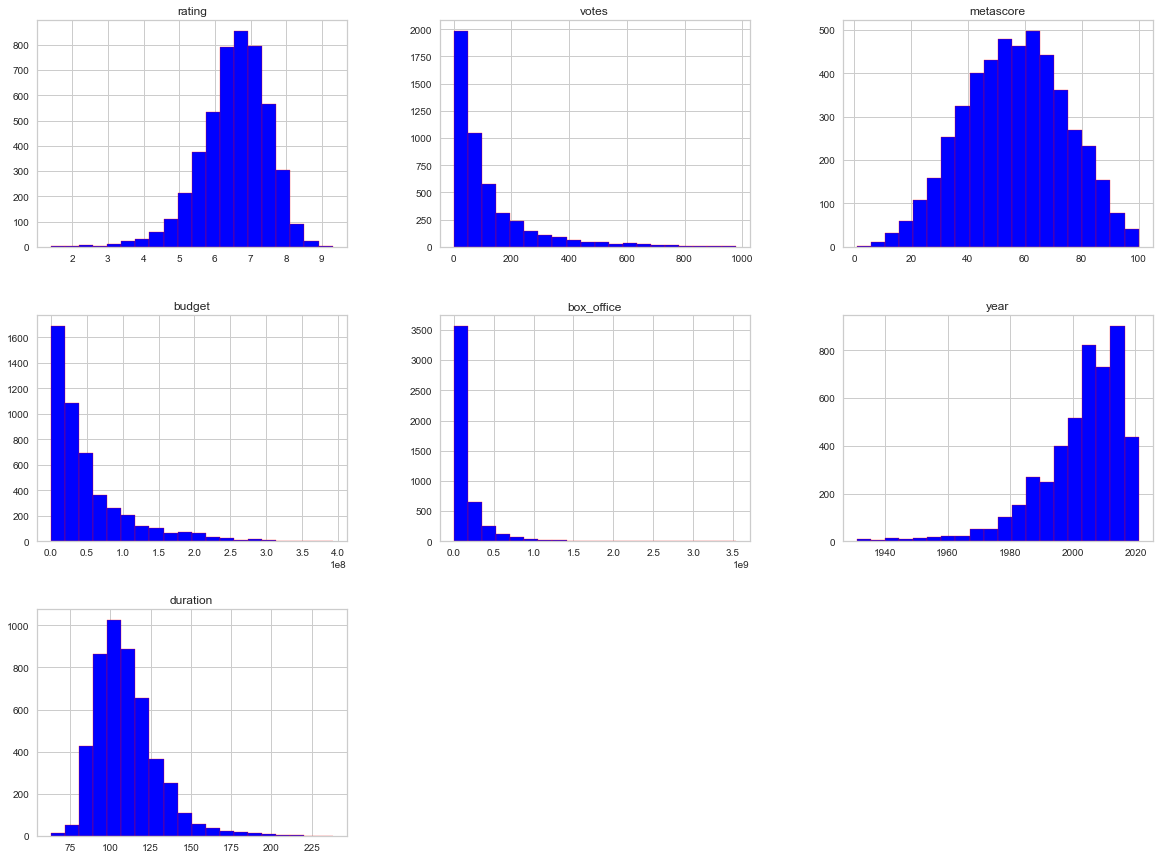

In [172]:
# plotTing histogram for each feature in the dataframe
mov_inf_df[['rating', 'votes', 'metascore', 'budget', 'box_office', 'year', 'duration']].hist(bins=20, figsize=(20, 15), 
                                                                                             color='blue', edgecolor='red', 
                                                                                             layout=(3, 3), grid=True)
plt.show()

From the feature distributions we can conclude that all but one variable follows the Gaussian or normal distribution, the metascore. The rating and duration variables are skewed to the left and right respectively.

It is interesting to note that the rating variable appears to have a mean between 6 & 7 which in my view implies some bias in the dataset. I would expect the mean to be closer to 5.

It is also striking that the budget and votes distributions mirror each other, with the box office being a close resemblance. It is possible that these features influence one another, or are simply a coincidence.

My next step is to plot a boxplot for each numeric feature in the dataset. I have decided to use boxplots in outlier detection due to the online post I have read from "Towards Data Science" [4] when familiarizing myself with boxplots and their use in understanding the variability and dispersion of data.

A second online source which I have found useful in the identification of outliers also comes from "Towards Data Science" [5]. From this source I have decided to use Tukeys boxplot method for identifying potential outliers within this dataset and to use this methadology in filtering the dataset accordingly. I have chosen this method specifically over the z-score and median absolute deviation as Tukeys method is robust to outliers and it does not require a normal Gaussian distribution, an aspect which most of the features share.

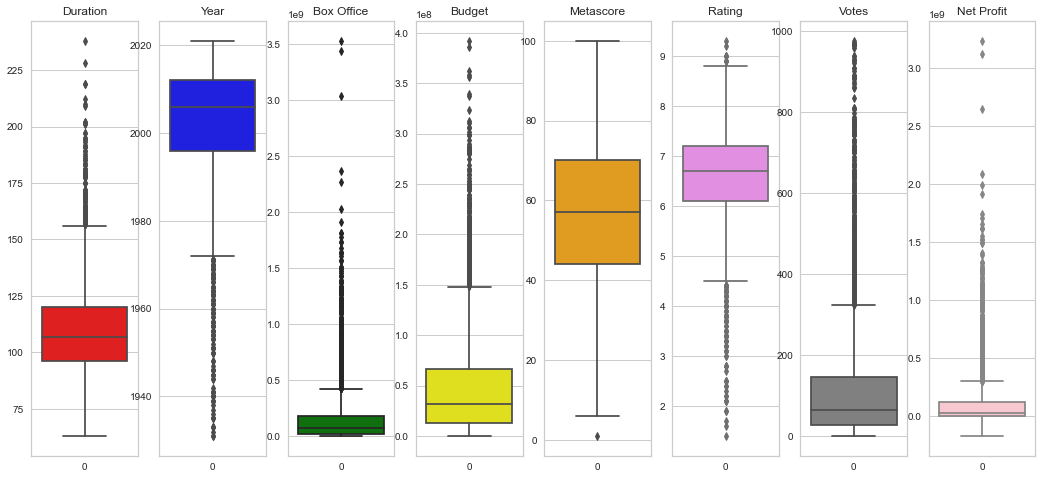

In [173]:
# plotting each variable in a separate boxplot

fig = plt.figure(figsize=(18,8))

ax = fig.add_subplot(181)
plt.title('Duration')
sns.boxplot(data=mov_inf_df['duration'], color='red')

ax = fig.add_subplot(182)
plt.title('Year')
sns.boxplot(data=mov_inf_df['year'], color='blue')

ax = fig.add_subplot(183)
plt.title('Box Office')
sns.boxplot(data=mov_inf_df['box_office'], color='green')

ax = fig.add_subplot(184)
plt.title('Budget')
sns.boxplot(data=mov_inf_df['budget'], color='yellow')

ax = fig.add_subplot(185)
plt.title('Metascore')
sns.boxplot(data=mov_inf_df['metascore'], color='orange')

ax = fig.add_subplot(186)
plt.title('Rating')
sns.boxplot(data=mov_inf_df['rating'], color='violet')

ax = fig.add_subplot(187)
plt.title('Votes')
sns.boxplot(data=mov_inf_df['votes'], color='grey')

ax = fig.add_subplot(188)
plt.title('Net Profit')
sns.boxplot(data=mov_inf_df['net_profit'], color='pink')

plt.show()

While it is clear from the box plots that outliers exist a closer inspection is required to analyse and decide if any outliers must be excluded from the dataset before further analysis is conducted.

From these box plot alone it is clear that the most extreme outliers lie in the votes, budget and box office features. Net profit also contains outliers however this is a result of the features used to calculate this variable.

For this purpose I will use an outlier detection function which will filter the movies_df based on selected criteria.

In [174]:
def outlier_detection(df, column, outer_fence, show_outlier_df):

    """
    Filters the input dataframe column by the outliers which can be derived from the inner or outer 
    fences, depending on boolean value.
    
    Input:
        df: pandas dataframe
        
        column: the column to be filtered
        
        outer_fence: a boolen for deciding between the outer or inner fences of Tukeys boxplot method, 
        if set to False the inner fence calculation will be used
        
        show_outlier_df: a boolen for returning df with outliers or without outliers
        
    Returns:
        Filtered dataframe consisting of outliers if set to True, otherwise return dataframe without outliers
    """
    
    # calculate the first and third quartile
    Q1 = df[column].quantile(0.25)     
    Q3 = df[column].quantile(0.75)
    
    # calculation for the inter quartile range
    IQR = Q3 - Q1

    # if else statement for the outer_fence boolean value to use the inner or outer fence in outlier calculation 
    if outer_fence is not False:
        mask = ((df[column] >= Q1 - 3*IQR) & (df[column] <= Q3 + 3*IQR))
    else:
        mask = ((df[column] >= Q1 - 1.5*IQR) & (df[column] <= Q3 + 1.5*IQR))
        
    # return df comprised of just outliers if False, otherwise return df without outliers 
    if show_outlier_df is not False:
        return df[~mask]
    else:
        return df[mask]

Using this function I will now filter each feature of the original dataframe before combining them all into one outlier dataframe. 

For the outlier function I will use the outer fence in the calculation as the article on detecting and treating outliers [2], which was mentioned before, suggets to perform. Personally I prefer to examine the most extreme outliers in a vacuum, to detect any potential issues within the dataset which is the reason I use the outer fence for outlier filtering.

In [175]:
# create an outlier dataframe for each feature 

rating_outliers = outlier_detection(mov_inf_df, 'rating', outer_fence=True, show_outlier_df=True)
duration_outliers = outlier_detection(mov_inf_df, 'duration', outer_fence=True, show_outlier_df=True)
year_outliers = outlier_detection(mov_inf_df, 'year', outer_fence=True, show_outlier_df=True)
box_office_outliers = outlier_detection(mov_inf_df, 'box_office', outer_fence=True, show_outlier_df=True)
budget_outliers = outlier_detection(mov_inf_df, 'budget', outer_fence=True, show_outlier_df=True)
metascore_outliers = outlier_detection(mov_inf_df, 'metascore', outer_fence=True, show_outlier_df=True)
votes_outliers = outlier_detection(mov_inf_df, 'votes', outer_fence=True, show_outlier_df=True)

These outlier series will now be combined into one dataframe.

In [176]:
# combining all outlier dataframes into one, containing unique entries only
outlier_df = pd.concat([rating_outliers, duration_outliers, year_outliers, box_office_outliers, 
                        budget_outliers, metascore_outliers, votes_outliers]).drop_duplicates().reset_index(drop=True)

# examining the outlier dataframe
outlier_df.head(3)

,title,year,genre,duration,director,rating,votes,metascore,star1,star2,star3,storyline,PG,budget,box_office,net_profit,storyline_processed,bins
0,Disaster Movie,2008,Comedy,87,Jason Friedberg,1.9,88.0,15.0,Carmen Electra,Vanessa Lachey,Nicole Parker,lisa two friends attempt flee manmade natural ...,15A,25580000.0,4.453072e+07,1.895072e+07,lisa two friend attempt flee manmad natur disa...,bronze
1,Baby Geniuses,1999,Comedy,97,Bob Clark,2.7,25.0,6.0,Kathleen Turner,Christopher Lloyd,Kim Cattrall,babyco worlds leading manufacturer baby produc...,PG,18277200.0,5.551812e+07,3.724092e+07,babyco world lead manufactur babi product howe...,silver
2,Dragonball Evolution,2009,Action,85,Akira Toriyama,2.5,71.0,45.0,Justin Chatwin,James Marsters,Chow Yun-Fat,beloved grandfather gohan verge death demon lo...,PG,37218000.0,6.912719e+07,3.190919e+07,belov grandfath gohan verg death demon lord pi...,silver


In [177]:
# examining statistical breakdown of outliers
outlier_df.describe()

,year,duration,rating,votes,metascore,budget,box_office,net_profit
count,415.000000,415.000000,415.000000,415.000000,415.000000,4.150000e+02,4.150000e+02,4.150000e+02
mean,1999.098795,124.332530,7.255663,418.159518,68.754217,1.237380e+08,6.643763e+08,5.406382e+08
std,21.924274,28.393207,1.318582,271.823011,18.791182,9.645418e+07,5.265873e+08,4.752059e+08
min,1931.000000,64.000000,1.400000,1.000000,6.000000,2.053500e+05,1.705956e+03,-1.714164e+08
25%,1996.000000,104.000000,6.900000,185.000000,58.000000,3.268750e+07,2.260163e+08,1.434622e+08
50%,2007.000000,121.000000,7.600000,423.000000,70.000000,1.125750e+08,6.902599e+08,5.315674e+08
75%,2013.000000,138.000000,8.000000,619.500000,84.000000,1.982038e+08,9.309712e+08,7.813245e+08
max,2019.000000,238.000000,9.200000,977.000000,100.000000,3.922500e+08,3.532294e+09,3.238271e+09


Observing the descriptive statistics of for each column it is not clear if any outliers should be removed. The year column does not conatin any values which are out of the ordinary as per the expectations of this dataset. In fact no column contains any extraordinary or impossible value. 

As a last check I will plot the outliers in a pairplot to visualise the variance in these outliers.

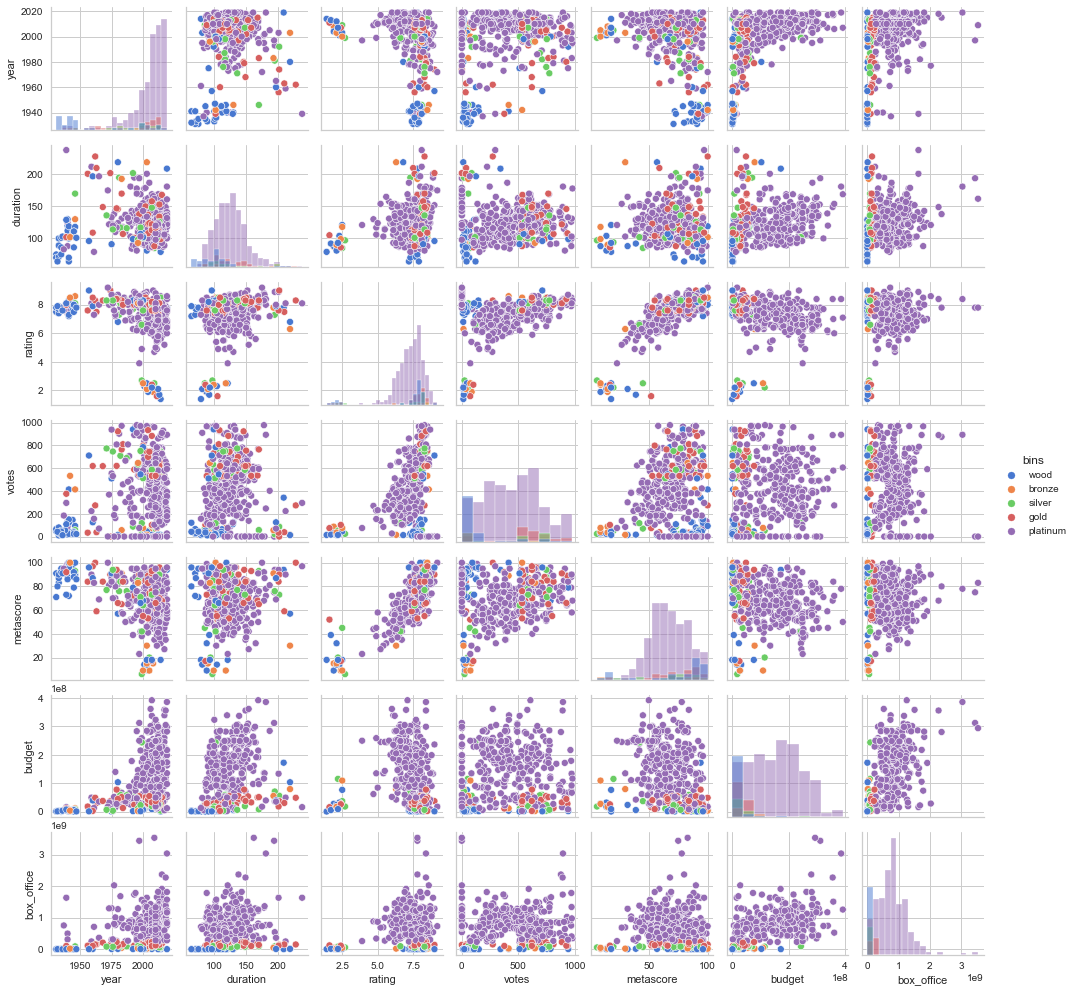

In [183]:
# pairplot on the outlier dataframe
sns.pairplot(outlier_df[['year', 'duration', 'rating', 'votes', 'metascore', 'budget', 'box_office', 'bins']], 
             hue='bins', height=2, diag_kind='hist', palette='muted')

plt.show()

Visualising the outliers reveals a possible issue with the dataset, the votes column appears to have multiple entries at or very close to 0, yet box office is quite strong for some of these apparently non-voted movies. This will be examined in the next section in more detail.

Another noticeable aspect is that there is a skew in the distribution of the data towards the upper fence of the data range. This can be clearly seen when the ratings feature is plotted against other variables. I would have expected the data to be more evenly distributed. This however was to be expected given that the box plots exhibited a great number of outliers in the upper fence and therefore the 'platinum' binned movies.

Apart from the votes feature which will be corrected in the next part, all other outliers will be kept in the dataset for now. I would consider removing outliers from the main dataframe when performing linear regression and comparing results with and without outliers. 

My motivation to keep oultiers stems from reading the article 'Detecting and Treating Outliers in Python' [6], where it states that while outliers can distort analysis they can also provide meaningful insights into the data that would otherwise go unnoticed. I believe that for this topic outliers will provide crucial insights into the data and should be kept.

### Outlier Detection - Votes feature

Examining the votes feature in more detail it appears that the supposedly non-voted movies are infact very popular, these movies are voted in the millions i.e. 1.0 is actually 1 million. I have checked this against the IMDB website for a variety of these movies. 

In [179]:
outlier_df.sort_values('votes').head()

,title,year,genre,duration,director,rating,votes,metascore,star1,star2,star3,storyline,PG,budget,box_office,net_profit,storyline_processed,bins
74,WALL·E,2008,Animation,98,Pete Docter,8.4,1.0,95.0,Ben Burtt,Elissa Knight,Jeff Garlin,distant unrealistic future mankind abandoned e...,G,230220000.0,6.667579e+08,4.365379e+08,distant unrealist futur mankind abandon earth ...,platinum
229,Joker,2019,Crime,122,Todd Phillips,8.4,1.0,59.0,Joaquin Phoenix,Robert De Niro,Zazie Beetz,arthur fleck works clown aspiring standup comi...,16,59658500.0,1.165352e+09,1.105694e+09,arthur fleck work clown aspir standup comic me...,platinum
242,Pirates of the Caribbean: The Curse of the Bla...,2003,Action,143,Gore Verbinski,8.0,1.0,63.0,Johnny Depp,Geoffrey Rush,Orlando Bloom,swashbuckling tale follows quest captain jack ...,12,199234000.0,9.310831e+08,7.318491e+08,swashbuckl tale follow quest captain jack spar...,platinum
84,Terminator 2: Judgment Day,1991,Action,137,William Wisher,8.5,1.0,75.0,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,10 years passed since first machine called ter...,15,178204200.0,9.100315e+08,7.318273e+08,10 year pass sinc first machin call termin tri...,platinum
129,Guardians of the Galaxy,2014,Action,121,James Gunn,8.0,1.1,76.0,Chris Pratt,Vin Diesel,Bradley Cooper,stealing mysterious orb far reaches outer spac...,12A,197353000.0,8.977822e+08,7.004292e+08,steal mysteri orb far reach outer space peter ...,platinum


This issues will now be resolved by subsetting the dataframe for values between 0 and 3.0 for the votes column. I have conducted spot checks on the votes column using the IMDB webiste and have concluded that this range should capture all movies with votes in the millions.

Once the desired movies have been captured the votes column will be multiplied by one thousand to bring these movies on the same scale as the rest of the dataset (which dispalys votes in thousands).

In [180]:
# conditional filter for original dataframe for votes greater or equal to 0 and less than 3.0
million_votes = mov_inf_df[(mov_inf_df['votes'] >= 0) & (mov_inf_df['votes'] <= 3.0)].copy()

# multiplying votes feature by one thousand 
million_votes['votes'] = million_votes['votes']*1000

# examine dataframe with millions of votes
million_votes.head()

,title,year,genre,duration,director,rating,votes,metascore,star1,star2,star3,storyline,PG,budget,box_office,net_profit,storyline_processed,bins
176,WALL·E,2008,Animation,98,Pete Docter,8.4,1000.0,95.0,Ben Burtt,Elissa Knight,Jeff Garlin,distant unrealistic future mankind abandoned e...,G,230220000.0,6.667579e+08,4.365379e+08,distant unrealist futur mankind abandon earth ...,platinum
184,The Dark Knight,2008,Action,152,Christopher Nolan,9.0,2400.0,84.0,Christian Bale,Heath Ledger,Aaron Eckhart,set within year events batman begins 2005 batm...,15A,236615000.0,1.286640e+09,1.050025e+09,set within year event batman begin 2005 batman...,platinum
314,Goodfellas,1990,Biography,146,Martin Scorsese,8.7,1000.0,90.0,Robert De Niro,Ray Liotta,Joe Pesci,henry hill might small time gangster may taken...,18,45027500.0,8.458556e+07,3.955806e+07,henri hill might small time gangster may taken...,silver
355,Terminator 2: Judgment Day,1991,Action,137,William Wisher,8.5,1000.0,75.0,Arnold Schwarzenegger,Linda Hamilton,Edward Furlong,10 years passed since first machine called ter...,15,178204200.0,9.100315e+08,7.318273e+08,10 year pass sinc first machin call termin tri...,platinum
357,The Silence of the Lambs,1991,Crime,118,Ted Tally,8.6,1300.0,85.0,Jodie Foster,Anthony Hopkins,Lawrence A. Bonney,fbi trainee clarice starling jodie foster work...,15,33194900.0,4.765092e+08,4.433143e+08,fbi traine claric starl jodi foster work hard ...,platinum


In [181]:
# updating the votes column of the original dataframe
mov_inf_df['votes'].update(million_votes['votes'])

In [45]:
# spot check for votes column on a previous know issue index
mov_inf_df[mov_inf_df.index.isin([176])]

,title,year,genre,duration,director,rating,votes,metascore,star1,star2,star3,storyline,PG,budget,box_office,net_profit,storyline_processed,bins
176,WALL·E,2008,Animation,98,Pete Docter,8.4,1000.0,95.0,Ben Burtt,Elissa Knight,Jeff Garlin,distant unrealistic future mankind abandoned e...,G,230220000.0,6.667579e+08,4.365379e+08,distant unrealist futur mankind abandon earth ...,platinum


Now that the votes column is in the correct format we can visualise the votes against the box office to see the corrected distribution of the data.

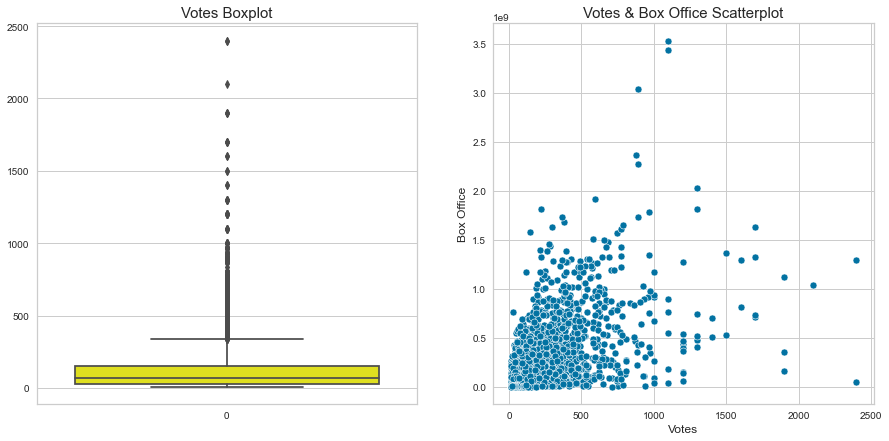

In [187]:
# visualising a boxplot and a scatterplot for the votes column against the box office column
fig = plt.figure(figsize=(15,7))

# creating the boxplot with the corrected votes column
ax = fig.add_subplot(121)
plt.title('Votes Boxplot', fontsize=15)
sns.boxplot(data=mov_inf_df['votes'], color='yellow')

# creating a scatterplot for the votes and box office features
ax = fig.add_subplot(122)
plt.title('Votes & Box Office Scatterplot', fontsize=15)
plt.xlabel('Votes', fontsize=12)
plt.ylabel('Box Office', fontsize=12)
sns.scatterplot(data=mov_inf_df, x='votes', y='box_office')

plt.show()

In the scatterplot there appears to be one point of interest which is very close to 2.4 million votes. This is a highly voted film with a very low box office and will be examined quickly in the cell below.

In [47]:
# indexing the scatterplot based upon the observed outlier
mov_inf_df[(mov_inf_df['votes'] >= 2300) & (mov_inf_df['votes'] <= 3000)]

,title,year,genre,duration,director,rating,votes,metascore,star1,star2,star3,storyline,PG,budget,box_office,net_profit,storyline_processed,bins
184,The Dark Knight,2008,Action,152,Christopher Nolan,9.0,2400.0,84.0,Christian Bale,Heath Ledger,Aaron Eckhart,set within year events batman begins 2005 batm...,15A,236615000.0,1.286640e+09,1.050025e+09,set within year event batman begin 2005 batman...,platinum
1915,The Shawshank Redemption,1994,Drama,142,Frank Darabont,9.3,2400.0,80.0,Tim Robbins,Morgan Freeman,Bob Gunton,chronicles experiences formerly successful ban...,15,41125000.0,4.740444e+07,6.279444e+06,chronicl experi formerli success banker prison...,silver


The movie in question appears to be 'The Shawshank Redemption', which is a very popular movie but somewhat of a flop at the box office. This has been confirmed and verified from the IMDB website. 

The votes feature has been corrected and is now ready for future analysis and linear regression input.

This concludes the outlier analysis for the votes variable. Now that all features are in the correct format we can begin analysis of each variable and its effect on the box office.

## Feature Analysis on Box Office Performance

I will begin by examining each feature in the dataset to get a better understanding of the effect this has on box office revenue.

In order to get a better understanding of the dataset I will calculate and plot the correlation coefficients between each variable. The correlation coefficients in the first coursework did not include the duration variable, nor did it include the corrected votes features and adjustments for inflation and as such I feel it will be beneficial to redo the correlations in this notebook in line with these amendments.

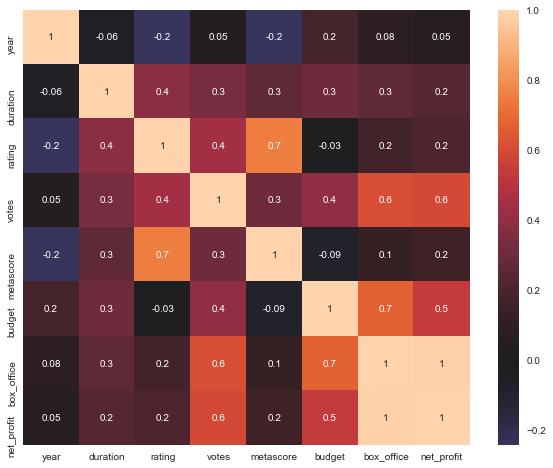

In [196]:
# calculating and plotting the correlation between feature variables
plt.figure(figsize=(10, 8))
ax = sns.heatmap(mov_inf_df.corr(), center=0, annot=True, fmt='.1g')

plt.show()

The most prominent feature in this correlation matrix is the budget, which has the strongest relationship with the box office. Of course this is quite logical, as a high budget will result in better effects, a more popular cast and a bigger marketing budget which should in theory result in higher revenues.

The second strongest correlation is between the box office and votes feature. This is somewhat encapsulated in the budget and box office correlation. This may be a result off the popularity of the movie as a consequence of a strong marketing campaign and highly rated actors. It is important to note that correlation does not equal causation and further investigation is required to arrive at a conclusion. Some key points are brought up in this article from 'Towards Data Science' [7] which I will use in my later analysis to distinguish between correlation and causation.

Surprisingly there are no other notable correlations between the features indicating that film success is concentrated in just a few key variables. This gives us an indication of what we can expect in future analysis.

### Examining Film Lenght and Box Office Success.

In this section I will examine the effect of film duration on box office revenue.

I will begin by plotting and examining the standart statistical measurements of the duration column.

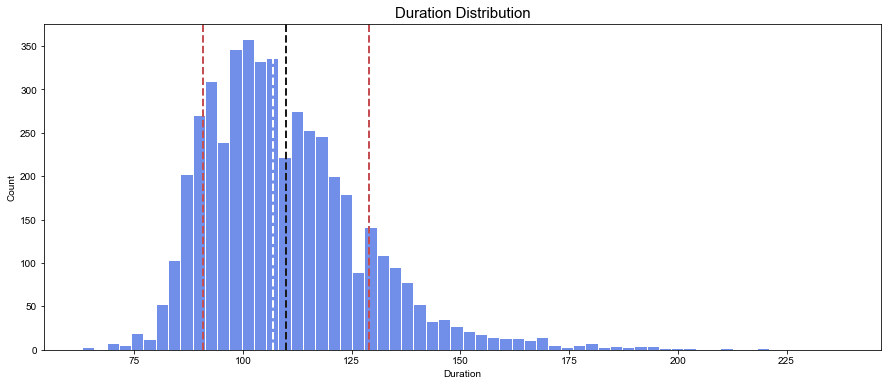

In [49]:
# calculating the mean, standart deviation and median to plot on the graph
duration_mean = mov_inf_df['duration'].mean()
duration_median = mov_inf_df['duration'].median()
duration_std = mov_inf_df['duration'].std()

# plotting the graph
plt.figure(figsize=(15, 6))
plt.title('Duration Distribution',fontsize=15)
sns.set_theme(style='whitegrid')
sns.histplot(x=mov_inf_df['duration'], color='royalblue').set(xlabel='Duration')

# plotting the mean and median
plt.axvline(duration_mean, color='k', linestyle='dashed', label = 'Mean',linewidth=2)
plt.axvline(duration_median, color='w', linestyle='dashed', label = 'Median',linewidth=2)

# plotting the std
plt.axvline(duration_mean+duration_std, color='r', linestyle='dashed', label = 'Mean +/- STD',linewidth=2)
plt.axvline(duration_mean-duration_std, color='r', linestyle='dashed', linewidth=2)

plt.show()

In [50]:
print(f'The median is {round(duration_median, 2)}')
print(f'The mean is {round(duration_mean, 2)}')
print(f'The standart deviation is {round(duration_std, 2)}')

The median is 107.0
The mean is 109.8
The standart deviation is 19.08


Examining the plot above it appears to follow an almost standart or Gaussian distribution, with a slight skew to the right.
This is reinforced by the fact that the median and mean values are very close together.

Looking at the aggregate table below for the duartion column we can see that there are disparities between movie lengths by genre.

We can also see an issue to which I eluded to in my first coursework, this dataset is heavily skewed towards a few specific genres. However, having said that the dataset is based on the top ranked movies on IMDB and as such the variation in the genre count mirrors to some degree the real world popularity of the respective genre.

In [51]:
# aggregating the mean, median, std and count of movies per genre for comparinson
mov_inf_df.groupby('genre')['duration'].agg([np.mean, np.median, np.std, np.count_nonzero]).sort_values(by='mean', 
                                                                                                        ascending=False)

,mean,median,std,count_nonzero
genre,,,,
Western,149.000000,149.5,17.944358,4
Biography,122.401216,120.0,20.575044,329
Mystery,118.300000,116.0,14.246329,20
Drama,115.852174,113.0,20.358216,805
Crime,114.666667,112.0,20.004527,336
Adventure,114.037543,109.0,24.015448,293
Action,113.394979,111.0,18.058568,1195
Family,112.750000,111.0,12.446552,4
Film-Noir,111.000000,111.0,NaN,1


For the purpose of this analysis I have decided to remove any genres consisting of less than 10 movies. Certain genres such as 'Music' and 'Family' contain too few films entries which is insufficient for statistical inference and therefore will be excluded.

In [200]:
# filtering the genre column for movie counts greater than 10
filtered_movies_df = mov_inf_df.groupby('genre').filter(lambda x: len(x) > 10)

# observing results of filter
filtered_movies_df.groupby('genre')['duration'].agg([np.mean, np.median, np.std, np.count_nonzero])

,mean,median,std,count_nonzero
genre,,,,
Action,113.394979,111.0,18.058568,1195
Adventure,114.037543,109.0,24.015448,293
Animation,92.172285,92.0,11.092922,267
Biography,122.401216,120.0,20.575044,329
Comedy,103.126958,102.0,12.592904,1213
Crime,114.666667,112.0,20.004527,336
Documentary,103.894737,96.0,21.962855,38
Drama,115.852174,113.0,20.358216,805
Fantasy,98.500000,94.5,13.875981,36


It is interesting to note the disparity in genre movie lenghts. Biographies are on average quite long while fantasy and horror and movies are short in comparison. Animations are also quite short, perhaps as a result of the high cost production associated with this genre given that every frame must be animated.

Next I will plot the averages of box_office and duration on a graph to detect any interesting patterns between these variables.

Firstly I will have to create two dataframes with each respective variables average and merge them into one dataframe to facilitate easier plotting with seaborn.

In [206]:
# creating a pandas series for the box_office average
avg_box_office = filtered_movies_df.groupby('genre')['box_office'].mean().round()

# converting series to dataframe
avg_box_office_df = avg_box_office.to_frame('avg_box_office')

# dataframe containing box office average by genre
avg_box_office_df.sort_values(by='avg_box_office', ascending=False)

,avg_box_office
genre,
Animation,375209498.0
Action,254652433.0
Adventure,203100298.0
Mystery,152051996.0
Comedy,99710264.0
Drama,95954091.0
Horror,86907280.0
Biography,85022576.0
Crime,82407327.0


In [205]:
# creating a pandas series for the duration average
avg_duration = filtered_movies_df.groupby('genre')['duration'].mean().round()

# converting series to dataframe
avg_duration_df = avg_duration.to_frame('avg_duration')

# dataframe containing duration average by genre
avg_duration_df.sort_values(by='avg_duration', ascending=False)

,avg_duration
genre,
Biography,122.0
Mystery,118.0
Drama,116.0
Crime,115.0
Adventure,114.0
Action,113.0
Documentary,104.0
Comedy,103.0
Fantasy,98.0


In [204]:
# merging the two dataframes into one by the 'genre' index
avg_duration_box = avg_box_office_df.merge(avg_duration_df, on='genre')

# examining the merged dataframe
avg_duration_box.sort_values(by='avg_duration', ascending=False)

,avg_box_office,avg_duration
genre,,
Biography,85022576.0,122.0
Mystery,152051996.0,118.0
Drama,95954091.0,116.0
Crime,82407327.0,115.0
Adventure,203100298.0,114.0
Action,254652433.0,113.0
Documentary,54491635.0,104.0
Comedy,99710264.0,103.0
Fantasy,67723676.0,98.0


It is intriguing that the animation genre while being the shortest on the runtime scale returns the highest box office revenue, on average. The data does not show any visible correlation between the runtime and film success, so far.

One potential issue with the two columns is the disparity between the box office, which is in the millions, and the duration column which is in tens. I believe that for plotting the data with a linear regression line it would be beneficial to scale the data before hand. I have first heard of data scaling and its importance in data science and linear regression most prominently from Dr. Jamie Ward at Goldsmiths University. I had then read an article online from 'statisticsbyjim' [8] which further solidified my understanding on the importance of data scaling.

Using this knowledge I have decided to standardize the dataframe before plotting a linear regression plot using seaborn.

In [56]:
# create a function for standardizing a dataframe

def standardize_df(df):
    """
    Standardises a dataframe. 
    
    Input:
        A pandas dataframe.
        
    Output:
        Returns a standardised dataframe.
    """

    df_copy = df.copy()                                                          # copies the input df
    for feature in df.columns:                                                   # loops through each column in df
        max_value = df[feature].max()                                            # records max of column
        min_value = df[feature].min()                                            # records min of column
        df_copy[feature] = (df[feature] - min_value) / (max_value - min_value)   # standardize each feature
    return df_copy                                                               # return standardized df

In [207]:
# standardize both features of merged df
standard_duration_box = standardize_df(avg_duration_box)

# examine results
standard_duration_box

,avg_box_office,avg_duration
genre,,
Action,0.624102,0.700000
Adventure,0.463363,0.733333
Animation,1.000000,0.000000
Biography,0.095196,1.000000
Comedy,0.140992,0.366667
Crime,0.087041,0.766667
Documentary,0.000000,0.400000
Drama,0.129280,0.800000
Fantasy,0.041258,0.200000


Now that the dataframe is in the desired form, I will plot these points on a scatter plot as well as a linear regression plot to show any trends in the data.

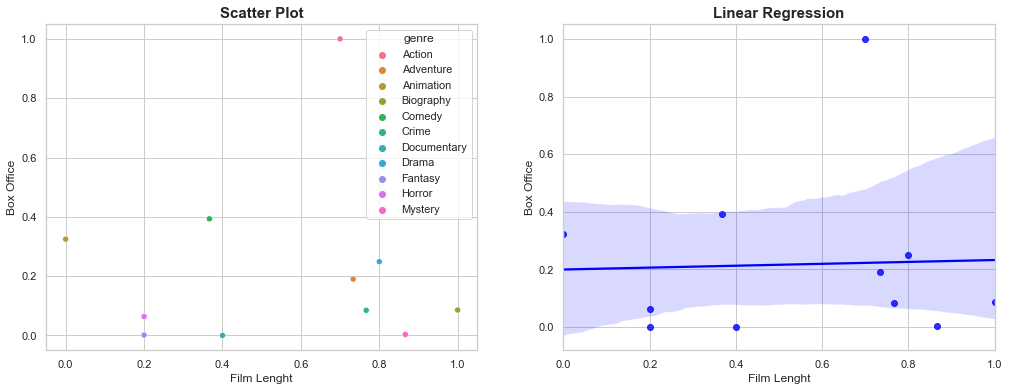

In [58]:
# plotting the graph
plt.figure(figsize=(17, 6))
sns.set_theme(style='whitegrid')

# plotting the scatter plot
plt.subplot(1,2,1)
plt.title('Scatter Plot', weight='bold', fontsize=15)
plt.xlabel('Film Lenght', fontsize=12)
plt.ylabel('Box Office', fontsize=12)
sns.scatterplot(x='avg_duration', y='avg_box_office', color='blue', data=standard_duration_box, 
                hue='genre', legend='brief')

# plotting a linear regression graph
plt.subplot(1,2,2)
plt.title('Linear Regression', weight='bold', fontsize=15)
sns.regplot(x='avg_duration', y='avg_box_office', data=standard_duration_box, marker='o', color='blue')
plt.xlabel('Film Lenght', fontsize=12)
plt.ylabel('Box Office', fontsize=12)

plt.show()

Observing the scatterplot and linear regression plot, there does not seem to be any clear indication of film lenght affecting box office revenue, given that the regression plot is almost completely horizontal.

Examining other resources on this topic such as a word press document by the name of 'Film and Digital Media'[9], it appears that I have arrived to a similar conclusion as its author. While the article does note that there is a slight correlation between box office and movie duration this factor may be explained by other means. The corellation is due to the variations in genre run time and subsequently the genres which are most popular. This point is further strenghtened
by a research papaer from the University of Columbia [10] which also showed a low correlation between movie run time and box office.

### Examining Director Influence on Box Office Success.

In this section I will explore to which degree the director influences a movies box office returns.

In [59]:
# number of unique directors in the dataset
print('The number of unique directors in the dataset is', mov_inf_df['director'].nunique())

The number of unique directors in the dataset is 2906


In [60]:
# most prominent directors in the dataset
mov_inf_df['director'].value_counts()[:10]

Woody Allen             26
M. Night Shyamalan      13
Clint Eastwood          13
David Koepp             12
Francis Ford Coppola    11
Steven Spielberg        11
Oliver Stone            11
Kevin Smith             11
Spike Lee               11
John Carpenter          11
Name: director, dtype: int64

In order to infer any meaningful information from the directors column, I will group the dataset by the director to better examine the trend between these two variables.

In [61]:
# create pandas series for sum of box office revenue by director
director_box_office = mov_inf_df.groupby('director')['box_office'].sum()

# convert series to dataframe
director_box_office = director_box_office.to_frame()

# sort dataframe by total box office by director
director_box_office = director_box_office.sort_values('box_office', ascending=False)

# add new column for average rating of director
director_box_office['director_metascore'] = mov_inf_df.groupby('director')['metascore'].mean()

# add new column for total budget of movies produced
director_box_office['director_budget'] = mov_inf_df.groupby('director')['budget'].sum()

# add new column for total number of movies produced as per this dataset
director_box_office['movies_produced'] = mov_inf_df['director'].value_counts()

# examine dataframe
director_box_office.head(10)

,box_office,director_metascore,director_budget,movies_produced
director,,,,
Peter Jackson,8.712783e+09,71.700000,1.596478e+09,10
George Lucas,8.132265e+09,72.666667,8.244296e+08,6
James Cameron,8.015102e+09,73.400000,9.609655e+08,5
Anthony Russo,7.461527e+09,70.400000,1.242830e+09,5
Steven Spielberg,6.646992e+09,69.909091,1.027828e+09,11
J.K. Rowling,6.486681e+09,76.000000,1.052435e+09,5
Christopher Nolan,5.566813e+09,74.875000,1.311732e+09,8
Michael Bay,5.475330e+09,38.000000,1.365241e+09,7
J.J. Abrams,4.994927e+09,69.666667,1.098199e+09,6


It is interesting to note that some of the more prominent directors such as George Lucas and James Cameron have a net deficit in this dataset, however they are very well received with high metascores. On the other hand Michael Bay has quite a low rating yet produces high box office movies. 

In [208]:
# number of directors with just one movie in the dataset
director_box_office[director_box_office['movies_produced'] == 1].count()

box_office            2053
director_metascore    2053
director_budget       2053
movies_produced       2053
dtype: int64

There are 2053 directors in the dataset with just one movie entry. In my opinion this is far too little data to accurately asses whether the director is meaningfully impacting the box office. As such I will filter the data to display only directors with three or more movies.

In [209]:
# filtering the directors dataframe for 3 or more movie entries
filter_director_box_office = director_box_office[director_box_office['movies_produced'] >= 3]

# examining the lenght of the filtered df
print('The lenght of the filtered director dataframe is', filter_director_box_office['movies_produced'].count())

The lenght of the filtered director dataframe is 414


In [64]:
# correaltion matrix for the director dataframe
corr = filter_director_box_office[['box_office', 'director_metascore', 'director_budget']].corr()
corr.style.background_gradient(cmap='coolwarm')

,box_office,director_metascore,director_budget
box_office,1.000000,0.111692,0.857584
director_metascore,0.111692,1.000000,0.028208
director_budget,0.857584,0.028208,1.000000


From the filtered directors dataframe we can ascertain that the directors budget is highly correlated to the directors box office. This is a somewhat unsurprising development as this correlation appears in the larger movies dataframe and as such bolsters the previous point that budget dictates box office. The average metascore for the director seems to play no part in determining a films success which once again mirrors the larger movies dataframe.

One study on this topic by the name of 'How to Measure the Power of Actors and Film Directors?' [11] suggests that the director while important in box office success is diluted by other factores such as the genre of the movie, the week of release and production method. That is not to say that the director can be overlooked, the regression of log-transformed domestic box office showed that the director is statistically significant, but not as significant as star power for example.

### Examining the Budget and its Effects on Box Office Success

The budget and box office have shown to have the highest correlation amongst all variables in the dataset with a correlation coefficient of 0.7. As such I expect that both my findings as well as other sources will echo this result.

I will first begin by examining some basic statistical methods and plots to get an understanding of the budget distribution.

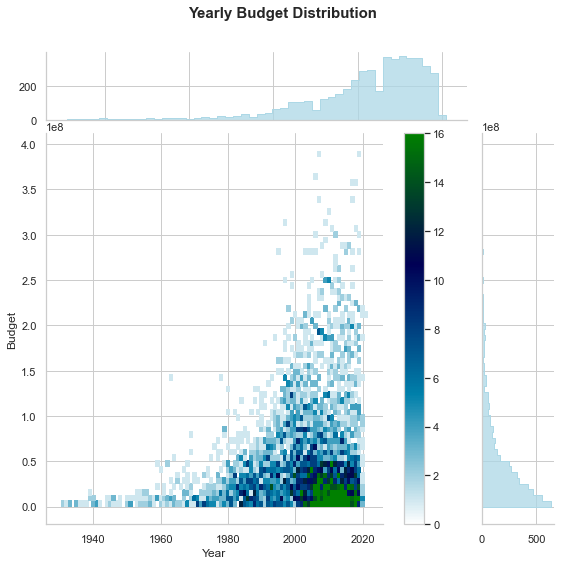

In [65]:
# plotting the yearly budget
g = sns.JointGrid(data=mov_inf_df, x='year', y='budget', marginal_ticks=True, height=8).set_axis_labels(xlabel='Year', 
                                                                                                        ylabel='Budget')

# plotting the side histograms
g.plot_joint(sns.histplot, discrete=(True, False), cmap='ocean_r', pmax=.8, cbar=True)
g.plot_marginals(sns.histplot, element="step", color='lightblue')

# adding title to plot
g.fig.suptitle("Yearly Budget Distribution", size=15, weight='bold')
g.fig.subplots_adjust(top=.9)

plt.show()

The budgets increase over time with a very strong concentration of high budgets happening between 2000 and 2020. This can also be seen on the side histograms as values continously increase up until 2021.

In [66]:
# examining descriptive statistics for budget
print(round(mov_inf_df['budget'].describe(), 0))

# examining the range and median 
print('\nThe budget range is', mov_inf_df['budget'].max() - mov_inf_df['budget'].min())
print('The budget median is', mov_inf_df['budget'].median())

count         4802.0
mean      50153805.0
std       54623473.0
min           2219.0
25%       13054775.0
50%       31701850.0
75%       66996000.0
max      392250000.0
Name: budget, dtype: float64

The budget range is 392247780.8000002
The budget median is 31701850.00000001


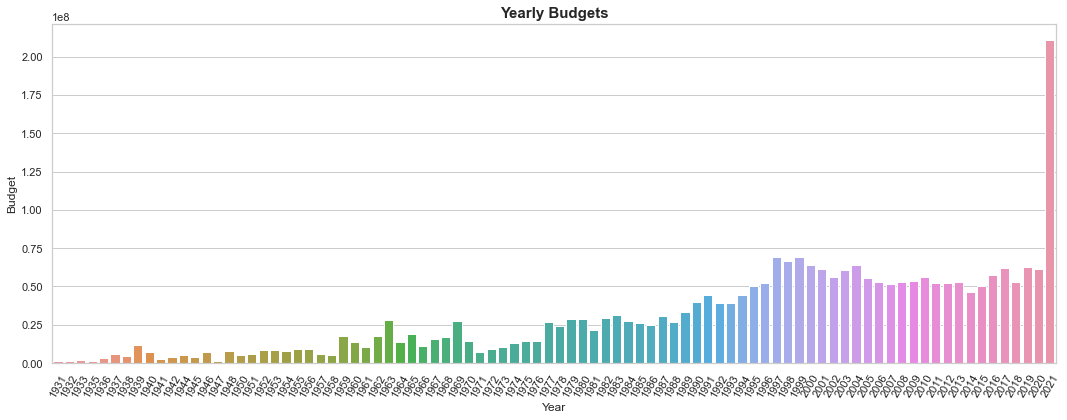

In [67]:
# create a dataframe for the mean of all budgets grouped by their respective years
mean_yearly_budget = mov_inf_df.groupby('year')['budget'].mean().to_frame().reset_index()

# display dataframe of average budget over the years
fig, axs = plt.subplots(figsize=(15,6))
g = sns.barplot(data=mean_yearly_budget, x='year', y='budget')
plt.xticks(rotation=60)
g.set_title('Yearly Budgets', weight='bold', fontsize=15)
g.set(xlabel='Year', ylabel='Budget')
plt.tight_layout()

plt.show()

One immediate noticeable outlier is the 2021 column which is very high compared to the rest. The reason for this is that 2021 only contains one movie, outlined in the cell below, which when compared to the averages of other films distorts the graph. I have decided to keep this movie in the dataset as upon further inspection there are many other years with just one entry in the dataset, predominantly in the first quartile and by removing 2021 it would only be fair to remove all other single movie entries. The aim of this exercise is to derive a connection between budget and box office and as such these movies will be kept and analysed.

In [68]:
# only one movie in 2021 with a very big budget
mov_inf_df[mov_inf_df['year'] == 2021]

,title,year,genre,duration,director,rating,votes,metascore,star1,star2,star3,storyline,PG,budget,box_office,net_profit,storyline_processed,bins
4725,Godzilla vs Kong,2021,Action,113,Adam Wingard,6.4,147.0,59.0,Alexander Skarsgård,Millie Bobby Brown,Rebecca Hall,legends collide godzilla kong two powerful for...,12A,210960000.0,4.685340e+08,2.575740e+08,legend collid godzilla kong two power forc nat...,platinum


Lastly I will plot a regression line for the two variables to visualise the correlation between them.

In order to better visualise the relationship I will group the budget and box office by their respective years to reduce the clutter of the scatter plot and to better understand how both variables have progressed over time.

In [69]:
# creating a dataframe for the total yearly box office
yearly_box_office = mov_inf_df.groupby('year')['box_office'].sum().to_frame()

# creating a dataframe for the total yearly budget
yearly_budget = mov_inf_df.groupby('year')['budget'].sum().to_frame()

# combining both dataframes into one
yearly_box_budget = yearly_box_office.join(yearly_budget)

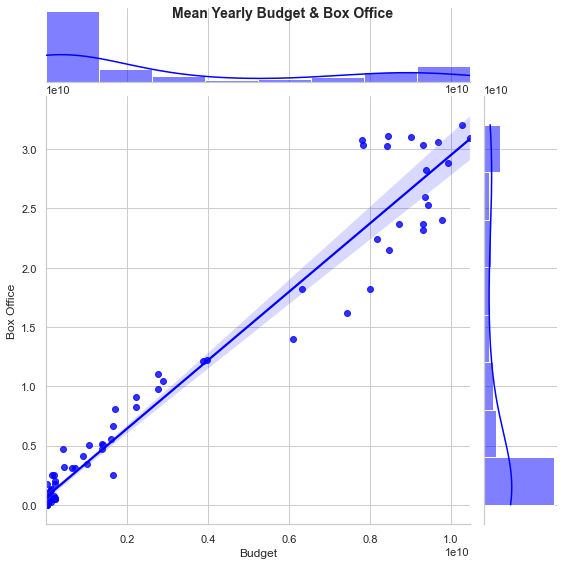

In [70]:
# plotting a regression plot for the average budget and box office
g = sns.jointplot(data=yearly_box_budget, x='budget', y='box_office', kind='reg', 
                  height=8, color='blue').set_axis_labels(xlabel='Budget', ylabel='Box Office')

g.fig.suptitle("Mean Yearly Budget & Box Office", size=14, weight='bold')

plt.show()

This plot visualises a very strong correlation between the budget and box office variables over time. It is quite clear that if we increase the budget we can expect a rather similar increase in the box office.

Let us also examine the correlation coefficient between these two yearly summed variables.

In [71]:
# correaltion matrix for the director dataframe
corr = yearly_box_budget.corr()
corr.style.background_gradient(cmap='coolwarm')

,box_office,budget
box_office,1.000000,0.978821
budget,0.978821,1.000000


As expected the correlation is very strong. When the budget and box office features are averaged on a yearly basis we see very strong correlation which concludes that the best predictor for success so far in this anaylsis is the budget. 

The study on 'Cinematic creativity and production budgets' [12] from the Journal of Creative Behaviour has concluded that for blockbusters and high box office hits a big budget is a 'good bet'. The strong correlation between the budget and box office demonstrates this adequately. In essence the film industry can 'purchse cinematic impact'. However the article goes on to say that strong budgets are cost prohibitive if the goal is to win best picture awards and are even counter intuitive due to the high profile of critical assessment.

This cause and effect of strong budgets is also shared by an article on 'How Critical Are Critical Reviews? The Box Office Effects of Film Critics, Star Power, and Budgets' [13] which covers the effects of budgets on the expected revenue. This article interestingly argues that film reviews affect box office success to a strong degree in the first eight weeks predominantly. If the said reviews are poor then a strong budget, which translates into lavish sets and popular directors and actors will blunt out the negative effects of said reviews, consequently increasing box office revenue. 

Whichever methadology we use the conclusion is the same, the budget is a good indicator of box office success.

### Examining Metascore effect on Box Office Success

In this section I will examine the effect of the metascore on box office success, which is in effect the rating of the movie. The ratings feature in this dataset is very similar to the metascore, the difference being that ratings are user ratings while the metascore is based upon critic ratings.

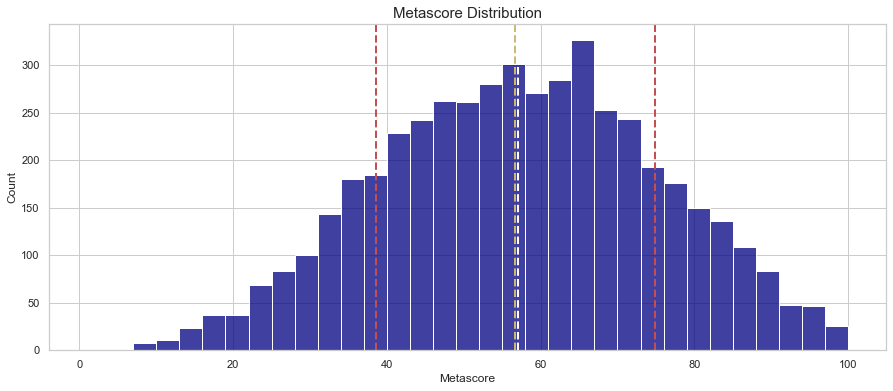

In [72]:
# calculating the mean, standart deviation and median to plot on the graph
metascore_mean = mov_inf_df['metascore'].mean()
metascore_median = mov_inf_df['metascore'].median()
metascore_std = mov_inf_df['metascore'].std()

# plotting the graph
plt.figure(figsize=(15, 6))
plt.title('Metascore Distribution',fontsize=15)
sns.set_theme(style='whitegrid')
sns.histplot(x=mov_inf_df['metascore'], color='navy').set(xlabel='Metascore')

# plotting the mean and median
plt.axvline(metascore_mean, color='y', linestyle='dashed', label = 'Mean',linewidth=2)
plt.axvline(metascore_median, color='w', linestyle='dashed', label = 'Median',linewidth=2)

# plotting the standart deviation
plt.axvline(metascore_mean+metascore_std, color='r', linestyle='dashed', label = 'Mean +/- STD',linewidth=2)
plt.axvline(metascore_mean-metascore_std, color='r', linestyle='dashed', linewidth=2)

plt.show()

In [73]:
print(f'The median is {round(metascore_median, 2)}')
print(f'The mean is {round(metascore_mean, 2)}')
print(f'The standart deviation is {round(metascore_std, 2)}')
print(f'The range is {mov_inf_df["metascore"].max() - mov_inf_df["metascore"].min()}')

The median is 57.0
The mean is 56.73
The standart deviation is 18.11
The range is 99.0


The median and mean are almost identical in this distribution and from the plot we can see that it highly resembles a normal Gaussian distribution. Interestingly the range is 99, meaning that there are entries in this dataset with a metascore of 1. This is peculiar due to the movies data having been sourced from the 'top rated' section on IMDB.

In [74]:
mov_inf_df[mov_inf_df['metascore'] <= 5]

,title,year,genre,duration,director,rating,votes,metascore,star1,star2,star3,storyline,PG,budget,box_office,net_profit,storyline_processed,bins
3931,Bio-Dome,1996,Comedy,88,Jason Bloom,4.4,26.0,1.0,Pauly Shore,Stephen Baldwin,William Atherton,bud doyle two losers nothing lives girlfriends...,15,23866500.0,2.136468e+07,-2.501822e+06,bud doyl two loser noth live girlfriend activ ...,bronze


Interestingly the metascore on this movie is in fact 1. I am perplexed as to why it is in the top rated movies list on IMDB.

Since the original correlation coefficient for the box office and metascore features was very low at 0.1, I have decided to group metascores based on their respective genres to examine potential insights across the group.

In [75]:
# creating a dataframe for metascores by genre
metascore_df = mov_inf_df.groupby('genre')['metascore'].mean().sort_values(ascending=False).to_frame()

# creating a series for genres grouped by box office
box_office_genre = mov_inf_df.groupby('genre')['box_office'].mean()

# creating a series for genres grouped by budget
budget_genre = mov_inf_df.groupby('genre')['budget'].mean()

# joining both series onto the metascore dataframe
metascore_df = metascore_df.join([box_office_genre, budget_genre]).reset_index()

# examining new dataframe
metascore_df

,genre,metascore,box_office,budget
0,Film-Noir,79.000000,7.266360e+04,6.487624e+06
1,Musical,70.000000,1.008867e+09,1.527540e+07
2,Western,69.750000,3.771460e+07,1.918363e+07
3,Documentary,68.736842,5.449163e+07,1.049714e+07
4,Biography,65.480243,8.502258e+07,3.296443e+07
5,Romance,65.333333,7.697544e+07,4.738822e+07
6,Family,64.000000,7.829963e+08,5.830389e+07
7,Animation,62.595506,3.752095e+08,9.955621e+07
8,Drama,61.919255,9.595409e+07,3.155555e+07
9,Crime,61.264881,8.240733e+07,3.252419e+07


In [76]:
# correlation matrix for the metascore dataframe
corr = metascore_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,metascore,box_office,budget
metascore,1.000000,0.194277,-0.229607
box_office,0.194277,1.000000,0.257462
budget,-0.229607,0.257462,1.000000


The matrix shows no interesting correlations between metascore by genre and the other variables. There is one odd insight however, there is a slight negative correlation between the budget and metascore. This would imply that as the metascore increases the budget decreases. I think that this is purely cirmustantial evidence based on the dataset used, this negative correlation was not observed on the larger dataset correlation and will be ignored.

Lastly I will plot a linear regression plot for the metascore and box office features with the budget acting as the size variant for the points on the graph. 

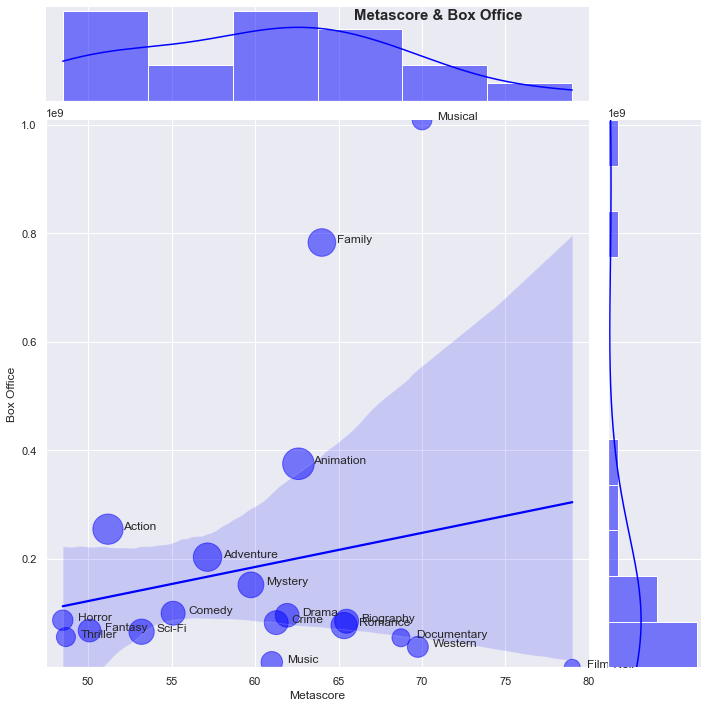

In [77]:
# plotting joint plot for metascore and box office
sns.set(style="darkgrid")

# using the budget to determine the size of each point on the graph
size = metascore_df['budget'].to_numpy()
s = [np.sqrt(s)**1/10 for s in size]

# plotting a jointplot with a linear regression line
g = sns.jointplot(data=metascore_df, x='metascore', y='box_office', kind='reg', 
                  height=10, color='blue', scatter_kws={'alpha':0.5, 's':s}).set_axis_labels(xlabel='Metascore', 
                                                                                             ylabel='Box Office')

g.fig.suptitle("Metascore & Box Office", size=15, weight='bold', horizontalalignment='left')

# adjusting the limis of the plot so better fit the genre name tags
plt.xlim(metascore_df.metascore.min()-1, metascore_df.metascore.max()+1)
plt.ylim(metascore_df.box_office.min()-1, metascore_df.box_office.max()+1)

# adding the genre tags for each point on the plot
for i in range(metascore_df.shape[0]):
    plt.text(x=metascore_df.metascore[i]+.9, y=metascore_df.box_office[i], s=metascore_df.genre[i])
    
plt.show()

From this jointplot we can see that there is no clear pattern in the data for these two variables. The 'Musical' genre contains just one entry, which was established earlier in the report, and as such is skewing the outcome of this plot, I believe its score would be lower had the dataset been comprised of a more even number of movie entries and therefore the linear regression line would be quite horizontal.

From this we may infer that there is little to no impact on the films critic rating and its predicted box office success. The study on critics and their impact on box office in the Journal of Marketing [13] which was eluded to earlier has concluded that critics play the role of influencers. Primarily the study found that negative reviews had a greater impact on the box office than positive reviews but only during the first eight weeks of a films release.

### Genre and its Impact on Box Office Success

In this section I will examine which genre is most profitable and predicted to lead to strong box office success.

In order to accomplish this I will build upon the genre dataframe used in the last section, adding to it grouped summaries for the remaining features.

In [78]:
# taking a copy of the metascore dataframe
genre_df = metascore_df.copy().reset_index(drop=True)

# creating a series for the average duration
genre_duration = mov_inf_df.groupby('genre')['duration'].mean()

# creating a series for the average votes
genre_votes = mov_inf_df.groupby('genre')['votes'].mean()

# creating a series for the average net profit
genre_profit = mov_inf_df.groupby('genre')['net_profit'].mean()

# creating a series for counts of movies
movie_genre_count = mov_inf_df.groupby('genre')['genre'].agg(np.count_nonzero)

# merging duration, votes and movie counts by genre to dataframe
genre_df = genre_df.join(on='genre', other=genre_duration)
genre_df = genre_df.join(on='genre', other=genre_votes)
genre_df = genre_df.join(on='genre', other=genre_profit)
genre_df = genre_df.join(on='genre', other=movie_genre_count, how='left', lsuffix='_left', rsuffix='_right')

# renaming two genre columns
genre_df = genre_df.rename(columns={'genre_left': 'genre', 'genre_right': 'count'})

# examining the dataframe
genre_df.sort_values(by='box_office', ascending=False)

,genre,metascore,box_office,budget,duration,votes,net_profit,count
1,Musical,70.000000,1.008867e+09,1.527540e+07,110.000000,249.000000,9.935912e+08,1
6,Family,64.000000,7.829963e+08,5.830389e+07,112.750000,218.000000,7.246924e+08,4
7,Animation,62.595506,3.752095e+08,9.955621e+07,92.172285,154.284644,2.756533e+08,267
15,Action,51.185774,2.546524e+08,8.404384e+07,113.394979,189.287029,1.706086e+08,1195
12,Adventure,57.150171,2.031003e+08,6.530815e+07,114.037543,152.116041,1.377922e+08,293
11,Mystery,59.750000,1.520520e+08,4.418079e+07,118.300000,274.500000,1.078712e+08,20
13,Comedy,55.088211,9.971026e+07,3.317119e+07,103.126958,88.436933,6.653907e+07,1213
8,Drama,61.919255,9.595409e+07,3.155555e+07,115.852174,124.228571,6.439854e+07,805
18,Horror,48.477551,8.690728e+07,1.740060e+07,97.783673,95.718367,6.950668e+07,245
4,Biography,65.480243,8.502258e+07,3.296443e+07,122.401216,117.364742,5.205814e+07,329


From this table we can infer that the Musical genre has the highest box office, however there is just one entry in this genre. I will once again drop all genres with less than 10 entries to rectify this issue.

In [79]:
# filtering the genre df for 10 or more movie couts
filtered_genre_df = genre_df[genre_df['count'] >= 10].reset_index(drop=True)

# examining dataframe
filtered_genre_df.sort_values(by='box_office', ascending=False)

,genre,metascore,box_office,budget,duration,votes,net_profit,count
2,Animation,62.595506,3.752095e+08,9.955621e+07,92.172285,154.284644,2.756533e+08,267
8,Action,51.185774,2.546524e+08,8.404384e+07,113.394979,189.287029,1.706086e+08,1195
6,Adventure,57.150171,2.031003e+08,6.530815e+07,114.037543,152.116041,1.377922e+08,293
5,Mystery,59.750000,1.520520e+08,4.418079e+07,118.300000,274.500000,1.078712e+08,20
7,Comedy,55.088211,9.971026e+07,3.317119e+07,103.126958,88.436933,6.653907e+07,1213
3,Drama,61.919255,9.595409e+07,3.155555e+07,115.852174,124.228571,6.439854e+07,805
10,Horror,48.477551,8.690728e+07,1.740060e+07,97.783673,95.718367,6.950668e+07,245
1,Biography,65.480243,8.502258e+07,3.296443e+07,122.401216,117.364742,5.205814e+07,329
4,Crime,61.264881,8.240733e+07,3.252419e+07,114.666667,151.684524,4.988313e+07,336
9,Fantasy,50.083333,6.772368e+07,2.642698e+07,98.500000,71.194444,4.129670e+07,36


From this table we can infer that the animation genre has the highest box office, a good metascore compared to the other genres and a very strong budget. The budget can be easily explained, animation movies are undoubtably very expensive to produce, this may be seen in their low runtime as well as every frame must be animated. At the same time the strong budget also influences the strong box office and given this the metascore is good as well. The only genres which are rated higher than this are documentary style genres which are based on real life events and as such I feel they have an easier time reaching high ratings for very small (comparatively) budgets.

The action genre has the second highest box office return and the second highest budget with an average metascore rating. The movie count is vast and almost the same as the comedy genre. Due to the high frequency of movies I believe that very strong performing films are obscured and diluted by the sea of poor/average performers. The same rhetoric may be applied to the comedy genre, except that there is less revenue incentive as compared to action movies. 

It is also crucial to note that on IMDB, where this dataset was scraped lists movies under multiple genres and for the purpose of this report only the first genre entry was recorded and assigned to each film. As such it is safe to assume that these results would differ had the second genre entry been recorded. 

To examine this perceived difference between the most popular movie genres I have used the statista website [14] to list the most popular genre from 1995 to 2021. The top 5 genres are as follows: Adventure, Action, Drama, Thriller, and Horror. Clearly my dataset sample did not accurately capture the true population genre distribution.

In [80]:
# correlation matrix for the genre dataframe
corr = filtered_genre_df[['metascore', 'box_office', 'budget', 'duration', 'votes', 'net_profit']].corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,metascore,box_office,budget,duration,votes,net_profit
metascore,1.000000,-0.036062,-0.075267,0.316883,-0.039526,-0.020302
box_office,-0.036062,1.000000,0.970422,-0.241962,0.488188,0.995617
budget,-0.075267,0.970422,1.000000,-0.084930,0.540214,0.943590
duration,0.316883,-0.241962,-0.084930,1.000000,0.469560,-0.298965
votes,-0.039526,0.488188,0.540214,0.469560,1.000000,0.460299
net_profit,-0.020302,0.995617,0.943590,-0.298965,0.460299,1.000000


Once again there is a powerful correlation between budget and box office, almost a 1 to 1 ratio. This is as expected given our previous findings examining the budget feature. Interestingly there is a correlation between the duration and votes feature. This is unprecedented and was not visible in any of my previous analysis. I believe this may be purely circumstantial given the dataset in use and not a meaningful factor for success.

A study on the determinants of box office success found that the action genre was the most prominent genre in the top box office films, however the study did not find any correlation between genre and box office returns. In fact the correlation was slightly negative between these two variables. Given these findings it is reasonable to conclude that there is no meaningful correlation between genre and box office success. [15]

### Stars Effect on Box Office Success

In this section I will examine the effects of the cast, the promininet stars of the films to identify any correlations or impact this has on the box office.

To do this I will group the movies dataframe by each star column and then combine into one dataframe.

In [81]:
# creating three dataframe for each star column and renaming the columns to easily combine the dataframes later
star1_df = mov_inf_df.groupby('star1').mean().reset_index().rename(columns={'star1': 'all_star'})
star2_df = mov_inf_df.groupby('star2').mean().reset_index().rename(columns={'star2': 'all_star'})
star3_df = mov_inf_df.groupby('star3').mean().reset_index().rename(columns={'star3': 'all_star'})

In [82]:
# combining all three dataframes into one
all_star_df = pd.concat([star1_df, star2_df, star3_df])

# examine new dataframe
all_star_df.head()

,all_star,year,duration,rating,votes,metascore,budget,box_office,net_profit
0,50 Cent,2005.0,117.0,5.4,45.0,45.0,5.494800e+07,6.396491e+07,9.016913e+06
1,A. Michael Baldwin,1979.0,89.0,6.7,33.0,72.0,7.410000e+05,2.961152e+07,2.887052e+07
2,A.J. Cook,2003.0,90.0,6.2,155.0,38.0,3.700060e+07,1.294183e+08,9.241772e+07
3,Aaliyah,2002.0,101.0,5.3,53.0,30.0,5.036150e+07,6.543989e+07,1.507839e+07
4,Aamir Khan,2012.0,140.0,7.2,40.0,65.0,8.845995e+06,6.313264e+06,-2.532731e+06


I suspect that there are duplicate cast entries given that there are three columns for each major star in the movie.

In [83]:
# checking for duplicate cast entries
duplicates = all_star_df['all_star'].duplicated()

print('No. of duplicate entries:', duplicates.sum())

No. of duplicate entries: 2179


As expected there are a vast amount of duplicates in the stars columns. 

I will remove them by grouping the datframe by each cast member, however care must be given to the many features of the data. Columns such as year and duration should be averaged whilst features such as box office should be summed. Therefore I will create two more dataframes to accomplish both tasks separately and combine them into one dataframe.

In [210]:
# creating a df for the features which should be averaged
all_star_df_p1 = all_star_df.groupby('all_star')[['year', 'duration', 'rating', 'votes', 'metascore']].mean().reset_index()

# creating a df for the features which should be summed
all_star_df_p2 = all_star_df.groupby('all_star')[['budget', 'box_office', 'net_profit']].sum().reset_index()

# merging both parts of the dataframe
complete_all_star_df = all_star_df_p1.merge(all_star_df_p2, on='all_star')

# examining new df
complete_all_star_df.sort_values(by='box_office', ascending=False)

,all_star,year,duration,rating,votes,metascore,budget,box_office,net_profit
3067,Mark Hamill,1992.333333,130.111111,7.544444,585.000000,79.222222,4.150928e+08,2.947571e+09,2.532479e+09
4061,Rupert Grint,2004.583333,150.416667,7.625000,598.666667,70.250000,3.694032e+08,2.638847e+09,2.269444e+09
1342,Ellen DeGeneres,2009.500000,98.500000,7.700000,609.000000,83.500000,3.624714e+08,2.514387e+09,2.151915e+09
3566,Orlando Bloom,2006.083333,148.416667,7.233333,537.416667,58.666667,6.171211e+08,2.264931e+09,1.647810e+09
1547,Gal Gadot,2017.333333,124.333333,6.833333,384.333333,64.000000,7.019541e+08,2.261920e+09,1.559966e+09
...,...,...,...,...,...,...,...,...,...
2279,John Gavin,1959.000000,125.000000,7.800000,15.000000,87.000000,6.616200e+06,1.207457e+03,-6.614993e+06
4135,Sandra Dee,1959.000000,125.000000,7.800000,15.000000,87.000000,6.616200e+06,1.207457e+03,-6.614993e+06
553,Brenda Vaccaro,1977.000000,123.000000,6.900000,21.000000,38.000000,1.305450e+07,1.049582e+03,-1.305345e+07
893,Coleen Gray,1956.000000,84.000000,8.000000,83.000000,91.000000,1.083072e+06,6.870738e+02,-1.082385e+06


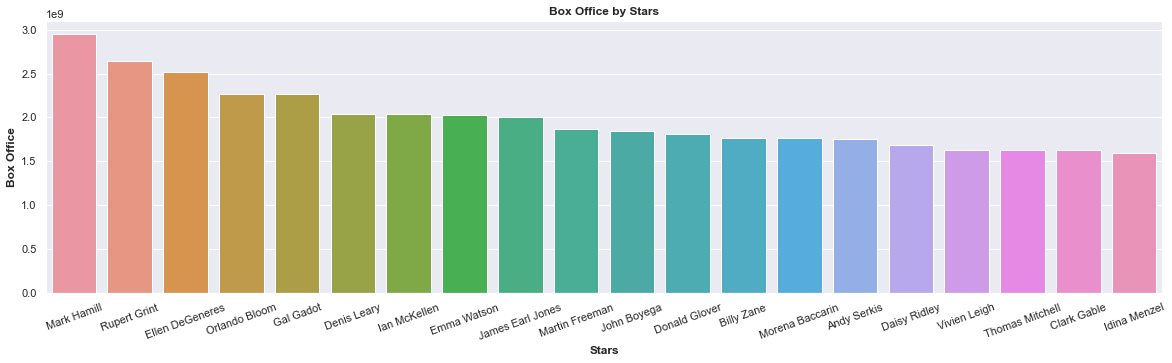

In [86]:
# plotting the top actors by box office gross

fig, axs=plt.subplots(figsize=(20,5))

g = sns.barplot(x=complete_all_star_df.sort_values(by='box_office', ascending=False)['all_star'][:20], 
             y=complete_all_star_df.sort_values(by='box_office', ascending=False)['box_office'][:20])

g.set_title('Box Office by Stars', weight = 'bold', )
g.set_xlabel('Stars', weight = 'bold')
g.set_ylabel('Box Office', weight = 'bold')
plt.xticks(rotation=20)

plt.show()

Using this new dataframe we can plot a correlation matrix to examine the effect of star power on the box office and other variables.

In [87]:
# correaltion matrix for the stars dataframe
corr = complete_all_star_df.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,year,duration,rating,votes,metascore,budget,box_office,net_profit
year,1.000000,-0.075554,-0.302909,0.026127,-0.313431,0.203468,0.116582,0.077292
duration,-0.075554,1.000000,0.344296,0.214693,0.244464,0.209161,0.181487,0.155668
rating,-0.302909,0.344296,1.000000,0.346886,0.781861,-0.032570,0.079989,0.109595
votes,0.026127,0.214693,0.346886,1.000000,0.241816,0.365156,0.517587,0.519960
metascore,-0.313431,0.244464,0.781861,0.241816,1.000000,-0.096265,0.030375,0.069179
budget,0.203468,0.209161,-0.032570,0.365156,-0.096265,1.000000,0.783541,0.640212
box_office,0.116582,0.181487,0.079989,0.517587,0.030375,0.783541,1.000000,0.978944
net_profit,0.077292,0.155668,0.109595,0.519960,0.069179,0.640212,0.978944,1.000000


We once again observe the expected correlations between budget and box office when aggregated by cast members. This suggests that a strong budget, which would support the high level cast, has a positive effect on the success of a movie, measured here as the box office revenue. This statement is reiterated in the 'Impact of star and movie buzz on motion picture distribution and box office revenue' article which suggests that a stars power has the ability to grab the attention of movie goers, boosting revenue as a result. The article goes on to say that even though actors may demand a high wage, visible in the budget, the research 'clearly demonstrates the positive impact of actor visibility
on overall box office performance'. [16]

### Votes and Box Office Success

In this section I will examine the effect of votes on the box office revenue.

In [212]:
# examining descriptive statistics for votes
print(round(mov_inf_df['votes'].describe(), 0))

# examining the range and median 
print('\nThe votes range is', mov_inf_df['votes'].max() - mov_inf_df['votes'].min())
print('The votes median is', mov_inf_df['votes'].median())

count    4802.0
mean      134.0
std       196.0
min        10.0
25%        30.0
50%        67.0
75%       153.0
max      2400.0
Name: votes, dtype: float64

The votes range is 2390.0
The votes median is 67.0


As noted previously the votes distribution is skewed to the right and heavily resembles the budget feature, which implies some correlation between these two features. 

From the descriptive statistics we can see that the median value is much lower than the average suggesting that there are some highly votes movies in the dataset. The standart deviation is also very large implying large variations between average movies and highly successful movies.

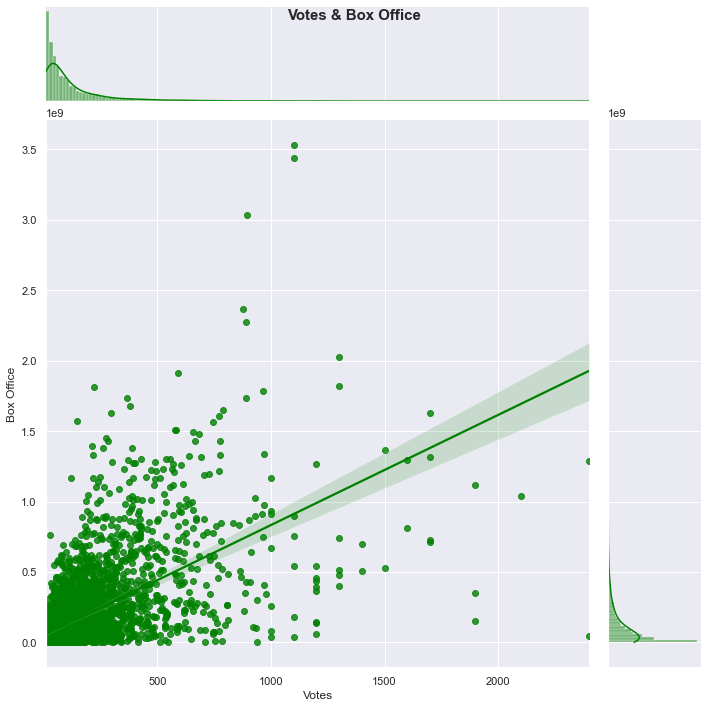

In [88]:
# linear regression scatter plot for the votes feature
g = sns.jointplot(data=mov_inf_df, x='votes', y='box_office', kind='reg', height=10, color='green').set_axis_labels(
                                                                                    xlabel='Votes', ylabel='Box Office')

g.fig.suptitle("Votes & Box Office", size=15, weight='bold', horizontalalignment='center')

plt.show()

There are many outliers within this dataset which influence the correlation both positively and negatively. 

In order to get a better understanding of the data I will remove the outliers and observe the effects on a similar graph. To do this I will use the outlier removal function to return the dataframe without outliers.

In [89]:
# removing outliers from votes feature
votes_outlier_filter_df = outlier_detection(mov_inf_df, 'votes', outer_fence=False, show_outlier_df=False)

# examine filtered df
votes_outlier_filter_df.head()

,title,year,genre,duration,director,rating,votes,metascore,star1,star2,star3,storyline,PG,budget,box_office,net_profit,storyline_processed,bins
1,The Last Unicorn,1982,Animation,92,Peter S. Beagle,7.4,25.0,70.0,Jeff Bridges,Mia Farrow,Angela Lansbury,riddlespeaking butterfly richard klein unicorn...,G,7414050.0,1.367433e+07,6.260276e+06,riddlespeak butterfli richard klein unicorn mi...,wood
2,The Beastmaster,1982,Action,118,Paul Pepperman,6.2,22.0,18.0,Marc Singer,Tanya Roberts,Rip Torn,dar son king hunted priest birth sent grow ano...,PG,16946400.0,2.977594e+07,1.282954e+07,dar son king hunt priest birth sent grow anoth...,bronze
3,Cat People,1982,Fantasy,118,Alan Ormsby,6.2,20.0,62.0,Nastassja Kinski,Malcolm McDowell,John Heard,cat people originated way back time humans sac...,18,38129400.0,1.482810e+07,-2.330130e+07,cat peopl origin way back time human sacrif wo...,bronze
4,Grease 2,1982,Comedy,115,Jim Jacobs,4.4,34.0,52.0,Michelle Pfeiffer,Maxwell Caulfield,Lorna Luft,two years lifealtering events sandys cousin mi...,PG,27961560.0,3.213774e+07,4.176178e+06,two year lifealt event sandi cousin michael st...,bronze
5,The Best Little Whorehouse in Texas,1982,Comedy,114,Peter Masterson,6.0,10.0,40.0,Burt Reynolds,Dolly Parton,Dom DeLuise,founded 1910 outside city limits gilbert locat...,R,74140500.0,1.476490e+08,7.350848e+07,found 1910 outsid citi limit gilbert locat lan...,gold


In [217]:
print('Length of dataframe without outliers:', len(votes_outlier_filter_df))

Length of dataframe without outliers: 4350


With the outliers now removed I will re-plot the graph and the correlation matrix and observe the new values.

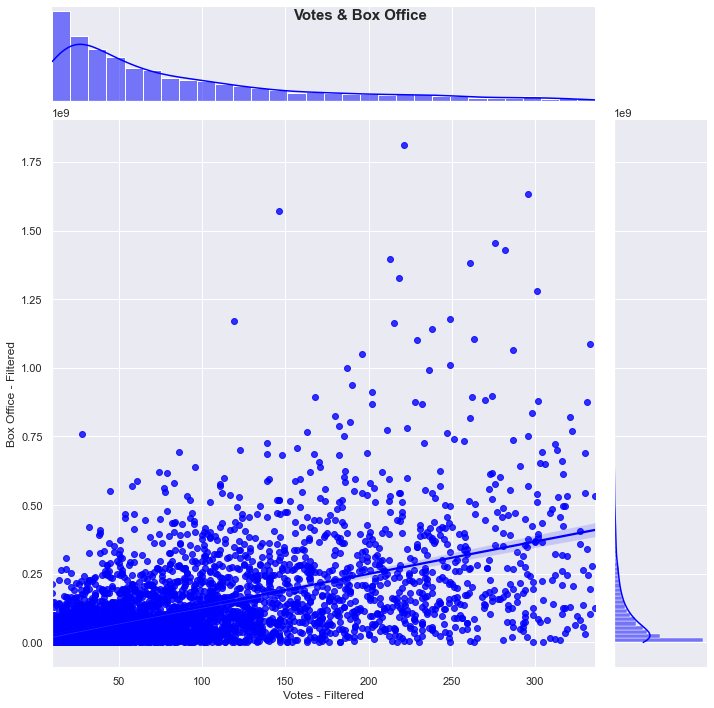

In [90]:
# linear regression scatter plot for the votes feaure, without outliers
g = sns.jointplot(data=votes_outlier_filter_df, x='votes', y='box_office', kind='reg', height=10, color='blue').set_axis_labels(
                                                                xlabel='Votes - Filtered', ylabel='Box Office - Filtered')

g.fig.suptitle("Votes & Box Office", size=15, weight='bold', horizontalalignment='center')

plt.show()

In [218]:
# correaltion matrix for the votes dataframe
corr = votes_outlier_filter_df[['box_office', 'votes']].corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,box_office,votes
box_office,1.000000,0.551783
votes,0.551783,1.000000


The correlation, while not as strong as before which was at 0.6, is still respectable at 0.55 and shows that there truly does exist a relationship between the two variables. From the regression plot we can also discern that very popular movies do not result in a strong box office, visible by the large number of points in the bottom right corner of the graph. So while there does exist a correlation, the votes feature is not enough to predict the box office on its own.

Lastly I will plot a graph for the votes by genre against the box office by genre to verify is any visible correlation exists.

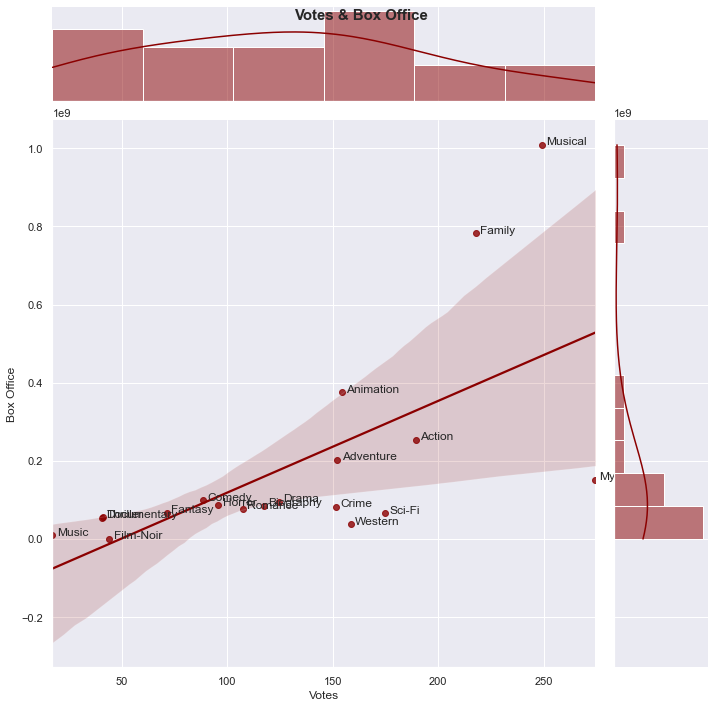

In [92]:
# regression plot for the votes and box office by genre
g = sns.jointplot(data=genre_df, x='votes', y='box_office', kind='reg', height=10, color='darkred').set_axis_labels(
                                                                                    xlabel='Votes', ylabel='Box Office')

g.fig.suptitle("Votes & Box Office", size=15, weight='bold', horizontalalignment='center')


# adding the genre tags for each point on the plot
for i in range(genre_df.shape[0]):
    plt.text(x=genre_df.votes[i]+2, y=genre_df.box_office[i]+1, s=genre_df.genre[i])

plt.show()

The musical genre once again appears as an outlier, given its very low movie count, alongside the family genre. All other genres are closely related in terms of votes per revenue and I suspect that if the outlier genres had a higher movie count they would regress towards the mean as well.

In [93]:
# total votes count per movie
mov_inf_df.groupby('bins')['votes'].sum()

bins
wood         45227.0
bronze       56168.0
silver       88887.0
gold        140521.0
platinum    314308.0
Name: votes, dtype: float64

It is interesting to see that even though the bins are equal in size, there is a clear increase in votes cast as the box office of the movies increases. Even though the votes increase in conjunction to the box office, it is not clear whether the votes are due to movie success or cast popularity. 

A study on this topic, 'Correlations between user voting data, budget, and box office for films in the Internet Movie Database'[17] emphasis the point that user votes are an indicator of a films prominence or popularity as movie goers are likely to vote on a movie that they have recently seen and is in the current spotlight. The study also concluded that the relationship between votes and budget is more closely intertwined than that of votes and box office as the former directly influences the marketing and prominence of the movie.

## Keras - Movie Recommendation

This pre-trained movie recommendation model is employed from the Keras website [18]. The code below has been slighty amended to integrate it with my own dataset.

The purpose of this code is to calcualte the probability that a user will like a certain movie based upon the movie ratings they have previously watched.

In [220]:
# importing necessary libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

The model requires a combination of ids for both the user and unique movies. As my dataset did not contain either of these features I will create them to be able to fit the model.

For the user ids I have decided to create 300 fictional users and distribute these ids randomly throughout the dataset. The original dataset used by the model contains 610 users and nearly 10k movies, given my movie count is just under half my user count has been adjusted accordingly.

In [221]:
# assign a random id between 1 and 300 to the dataset
mov_inf_df['userId'] = np.random.randint(1, 301, size=len(mov_inf_df))

# no. of movies by id
mov_inf_df.groupby('userId')['title'].count()

userId
1       8
2      12
3      19
4      19
5      30
       ..
296    11
297    17
298    18
299    16
300    21
Name: title, Length: 300, dtype: int64

In [222]:
# assign index per row
mov_inf_df['movieId'] = mov_inf_df.index + 111

# examine index created for each movie
mov_inf_df.groupby('movieId')['title'].count()

movieId
111     1
112     1
113     1
114     1
115     1
       ..
4908    1
4909    1
4910    1
4911    1
4912    1
Name: title, Length: 4802, dtype: int64

In [224]:
#examine id columns
mov_inf_df.head()

,title,year,genre,duration,director,rating,votes,metascore,star1,star2,star3,storyline,PG,budget,box_office,net_profit,storyline_processed,bins,userId,movieId
0,Blade Runner,1982,Action,117,David Webb Peoples,8.1,709.0,84.0,Harrison Ford,Rutger Hauer,Sean Young,early twentyfirst century tyrell corporation c...,15,59312400.0,8.828413e+07,2.897173e+07,earli twentyfirst centuri tyrel corpor call ne...,silver,19,111
1,The Last Unicorn,1982,Animation,92,Peter S. Beagle,7.4,25.0,70.0,Jeff Bridges,Mia Farrow,Angela Lansbury,riddlespeaking butterfly richard klein unicorn...,G,7414050.0,1.367433e+07,6.260276e+06,riddlespeak butterfli richard klein unicorn mi...,wood,66,112
2,The Beastmaster,1982,Action,118,Paul Pepperman,6.2,22.0,18.0,Marc Singer,Tanya Roberts,Rip Torn,dar son king hunted priest birth sent grow ano...,PG,16946400.0,2.977594e+07,1.282954e+07,dar son king hunt priest birth sent grow anoth...,bronze,51,113
3,Cat People,1982,Fantasy,118,Alan Ormsby,6.2,20.0,62.0,Nastassja Kinski,Malcolm McDowell,John Heard,cat people originated way back time humans sac...,18,38129400.0,1.482810e+07,-2.330130e+07,cat peopl origin way back time human sacrif wo...,bronze,137,114
4,Grease 2,1982,Comedy,115,Jim Jacobs,4.4,34.0,52.0,Michelle Pfeiffer,Maxwell Caulfield,Lorna Luft,two years lifealtering events sandys cousin mi...,PG,27961560.0,3.213774e+07,4.176178e+06,two year lifealt event sandi cousin michael st...,bronze,246,115


With the user and movie ids in place we can move on to model preparation.

Firstly the movies and users need to be encoded as integer indices.

In [97]:
user_ids = mov_inf_df["userId"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
movie_ids = mov_inf_df["movieId"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}
mov_inf_df["user"] = mov_inf_df["userId"].map(user2user_encoded)
mov_inf_df["movie"] = mov_inf_df["movieId"].map(movie2movie_encoded)

num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)
mov_inf_df["rating"] = mov_inf_df["rating"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(mov_inf_df["rating"])
max_rating = max(mov_inf_df["rating"])

print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_movies, min_rating, max_rating
    )
)

Number of users: 300, Number of Movies: 4802, Min rating: 1.399999976158142, Max rating: 9.300000190734863


#### Splitting the data into test and train sets.

In [98]:
mov_inf_df = mov_inf_df.sample(frac=1, random_state=42)
x = mov_inf_df[["user", "movie"]].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = mov_inf_df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * mov_inf_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

#### Creating the Model

We embed both users and movies in to 50-dimensional vectors.

The model computes a match score between user and movie embeddings via dot product, and adds a per-movie and per-user bias. The match score is scaled to the [0, 1] interval via a sigmoid (since our ratings are normalized to this range).

In [99]:
EMBEDDING_SIZE = 50

class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)


model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001)
)

#### Model Training

In [100]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=5,
    verbose=1,
    validation_data=(x_val, y_val),
)

Epoch 1/5
68/68 [==============================] - 1s 4ms/step - loss: 0.6936 - val_loss: 0.6752
Epoch 2/5
68/68 [==============================] - 0s 2ms/step - loss: 0.7097 - val_loss: 0.6819
Epoch 3/5
68/68 [==============================] - 0s 2ms/step - loss: 0.7011 - val_loss: 0.6833
Epoch 4/5
68/68 [==============================] - 0s 2ms/step - loss: 0.6890 - val_loss: 0.6879
Epoch 5/5
68/68 [==============================] - ETA: 0s - loss: 0.666 - 0s 2ms/step - loss: 0.6667 - val_loss: 0.6878


#### Plot training and validation loss

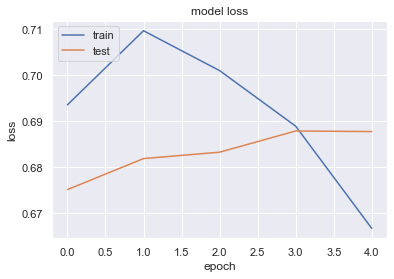

In [101]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

#### Show top 10 movie recommendations for a user

In [102]:
# Let us get a user and see the top recommendations.
user_id = mov_inf_df.userId.sample(1).iloc[0]
movies_watched_by_user = mov_inf_df[mov_inf_df.userId == user_id]
movies_not_watched = mov_inf_df[
    ~mov_inf_df["movieId"].isin(movies_watched_by_user.movieId.values)
]["movieId"]
movies_not_watched = list(
    set(movies_not_watched).intersection(set(movie2movie_encoded.keys()))
)
movies_not_watched = [[movie2movie_encoded.get(x)] for x in movies_not_watched]
user_encoder = user2user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
)
ratings = model.predict(user_movie_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded2movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
]

print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("Movies with high ratings from user")
print("----" * 8)
top_movies_user = (
    movies_watched_by_user.sort_values(by="rating", ascending=False)
    .head(5)
    .movieId.values
)
movie_df_rows = mov_inf_df[mov_inf_df["movieId"].isin(top_movies_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ":", row.genre)

print("----" * 8)
print("Top 10 movie recommendations")
print("----" * 8)
recommended_movies = mov_inf_df[mov_inf_df["movieId"].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
    print(row.title, ":", row.genre)

Showing recommendations for user: 250
Movies with high ratings from user
--------------------------------
Runaway Jury : Crime
Election : Comedy
Kung Fu Panda 2 : Animation
Crimes and Misdemeanors : Comedy
Iron Man 2 : Action
--------------------------------
Top 10 movie recommendations
--------------------------------
The Last Samurai : Action
The Craft : Drama
Shattered Glass : Drama
The Kite Runner : Drama
Salinui chueok : Crime
Something's Gotta Give : Comedy
Savage Grace : Drama
Reign Over Me : Drama
Intolerable Cruelty : Comedy
Escape from L.A. : Action


### Natural Language Processing

In this section I would like to classify movies into their distinctive quintile bins using the movies respective storyline. What I would like to examine is whether we are able to predict a films success purely from the storyline description.

The storyline column has already been processed and prepared for model prediction in the first part of the coursework.

In [103]:
# examining processed storyline feature
mov_inf_df['storyline_processed'][0]

'earli twentyfirst centuri tyrel corpor call nexu phase develop robot call replic suppos aid societi replic look act like human superhuman gener nexu 6 replic use danger offearth endeavor began mutini offearth coloni replic becam illeg earth polic unit call blade runner job destroy parlanc retir replic make way back creat earth anyon convict aid assist replic sentenc death novemb 2019 lo angel california rick deckard former blade runner call retir four known replic combat model made way back earth leader roy batti one leon kowalski tri infiltr way tyrel corpor employe sinc abl escap beyond follow leon trail hope find retir deckard believ part help figur replic want tyrel corpor tri infiltr answer may lie tyrel failsaf backup mechan beyond track four deckard face possibl dilemma encount fifth replic rachael work tyrel assist issu dr elden tyrel experi provid fake memori abl better control memori rachael idea human problem rachael assist deckard begin develop feel'

In [104]:
# importing necessary libraries for this section

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [105]:
# transform text into vector on the basis of word frequency
cv = CountVectorizer(analyzer='word')
matrix = cv.fit_transform(movies_df['storyline_processed'])
movies_cv = pd.DataFrame(matrix.toarray(), columns=cv.get_feature_names())
movies_cv.index = movies_df.index

In [106]:
# examine the matrix
movies_cv.head()

,00,007,06,10,100,1000,10000,100000,100000000,10000000000,...,zula,zym,ásgeirsson,åkneset,ève,édith,émigré,époqu,überfam,übersleepi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I will use random forest as my classifier due the many benefits associated with it, such as high accuracy and robustness due to the many decision trees or stumps used in the model.

As there are many parameters which may be tweaked for this classifier, in order to improve accuracy I will used a grid search to uncover the best parameters for high accuracy. In order to do this I will have to encode the bins feature and use this in the parameter search.

In [107]:
# copying the dataframe
encoded_bins = mov_inf_df.copy()

# encoding the bins column
encoded_bins = pd.get_dummies(encoded_bins['bins'])

# examining new dataframe with encoded bins
encoded_bins.head()

,wood,bronze,silver,gold,platinum
596,0,1,0,0,0
4507,1,0,0,0,0
3049,0,0,0,1,0
2957,0,0,0,0,1
8,0,1,0,0,0


In [108]:
# splitting the dataset into test and train

X = movies_cv
y = mov_inf_df['bins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state=111)

Now I will use the grid search function in conjunction with multiple parameters to uncover the most optimal combination. The range of the parameter search can be increased however this comes at a substantial increase in model training time.

In [ ]:
# create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [6, 8, 10],
    'n_estimators': [100, 200, 300]
}

# create a base model for parameter search
rf = RandomForestClassifier()

# istantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

#### Warning - the cell below can take circa 10 minutes to run.

In [135]:
# fit the grid search to the data
#grid_search.fit(X, encoded_bins)

# see best parameters for model
#grid_search.best_params_

Fitting 2 folds for each of 648 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed: 13.0min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 100}

Now I will use these parameters to train the classifier and examine the accuracy.

In [110]:
# creating the classifier with the optimal parameters
forest = RandomForestClassifier(n_estimators=100, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=6, 
                                bootstrap=True)

In [111]:
# fitting the data to the classifier
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=3,
                       min_samples_split=6)

In [112]:
# using the model to predict results
y_pred = forest.predict(X_test)

In [113]:
# running the model multiple times and taking the average 
scores = cross_val_score(forest, X_train, y_train, cv=5)

# average accuracy result
print('The average accuracy of CV is', round(scores.mean(), 3))

The average accuracy of CV is 0.204


In [114]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

      bronze       0.33      0.00      0.01       208
        gold       0.18      0.91      0.31       179
    platinum       0.16      0.02      0.04       192
      silver       0.27      0.02      0.03       193
        wood       0.24      0.04      0.07       189

    accuracy                           0.19       961
   macro avg       0.24      0.20      0.09       961
weighted avg       0.24      0.19      0.09       961



The accuracy value is low, even with the tuned parameters. It would appear that categorising movies into 5 separate bins is difficult and produces sub-par results. 

Instead of using the scikit confusion matrix I decided to use my own, which gives a clearer view of the categories and is easier to read (Papanaga, 2021). 

In [115]:
def conf_matrix(y_test, y_pred):
    """
    Returns a confusion matrix of the prediction.
    Inputs are the actual values and predicted values.
    """
    y_test = pd.Series(y_test, name='Actual')                     # transform actual dataset to a pandas series
    y_pred = pd.Series(y_pred, name='Predicted')                  # transform predicted dataset to a pandas series
    confusion_matrix = pd.crosstab(y_test, y_pred, margins=True)  # create confusion matrix from from both pandas series
    
    return confusion_matrix

In [116]:
conf_matrix(y_test, y_pred)

Predicted,gold,platinum,silver,wood,All
Actual,,,,,
wood,26,1,0,2,29
bronze,39,2,1,2,44
silver,31,1,1,3,36
gold,32,1,0,2,35
platinum,35,1,0,0,36
All,163,6,2,9,180


A very large number of the predictions where gold, resulting in very low accuracy. This model requires further tweaking to achieve good results. In addition to this I believe that a binary classification would achieve better accuracy, however due to time constraints re-calibrating the bins and dataset will not be viable.

Unfortunately the classification of the storylines did not yield in a viable model for movie success prediction. This is somewhat reflected in the wider community given that no other online source or pre-trained model of this type of classifiaction have been found.

## Linear Regression

I will create and run a linear regression model for the purpose of predicting the box office revenue given a number of independent features which have been explored in this report. 

Before running linear regression however I need to check for multicollinearity. 
Once again I will use a correlation table to identify multicollinearity within the independant variables. 

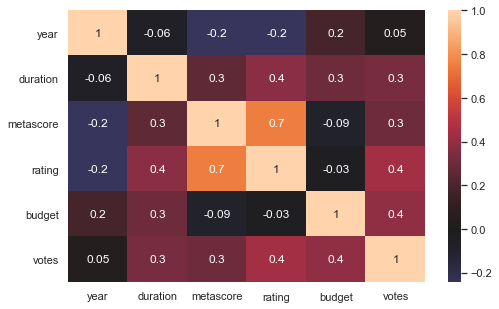

In [117]:
# correlation matrix for the independant variables to be used in linear regression
plt.figure(figsize=(8, 5))
ax = sns.heatmap(mov_inf_df[['year', 'duration', 'metascore', 'rating', 'budget', 'votes']].corr(), 
                 center=0, annot=True, fmt='.1g')

This dataset suffers from slight multicollinearity with the main issue stemming from the 'metascore' and 'rating' features. This may prove to be an issue as the coefficients can become very sensitive to small changes in the model and reduces the statistical power of the model.

Based upon my research from an online web source [19] we do not always have to fix multicollinearity if it is judged to be moderate in effect, which is the case in this report. However, given the issue of bias affecting the ratings feature on IMDB as concluded from an online article [20] I will be removing this feature from the pool of independant variables. 

### Decision Not to Standardize

Based upon the article attached [21] there is no benefit to standardizing or centering the data prior to running a linear regression model and therefore I will not standardize the dataframe prior to performing multiple linear regression.

### Linear Regression Model

Multi-variate linear regression will be performed to predict revenue (dependant variable) using the year, duration, votes, metascore and budget (independent variables).

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# assigning the independant variables
X = mov_inf_df[['votes', 'budget', 'metascore', 'year', 'duration']]

# assigning the dependant variable
y = mov_inf_df['box_office']

# partitioning into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# creating and fitting the data to the basic model
linear_regression = LinearRegression(fit_intercept=True, normalize=True,) 
linear_regression.fit(X_train, y_train)

# predicting the test set using trained model
y_pred = linear_regression.predict(X_test)

In [119]:
# creating a dataframe to visualise the the variable coefficients

coeff_df = pd.DataFrame(linear_regression.coef_, X.columns, columns=['Coefficient'])  

# examine the coefficients and metrics
print(coeff_df)
print('\nThe intercept coefficient is:', linear_regression.intercept_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

             Coefficient
votes      524322.902462
budget          2.554564
metascore  657828.802466
year      -560977.833608
duration  -620076.944035

The intercept coefficient is: 1113228032.77735
Mean Absolute Error: 92882294.25509574
Mean Squared Error: 2.9099803983546956e+16
Root Mean Squared Error: 170586646.55695343


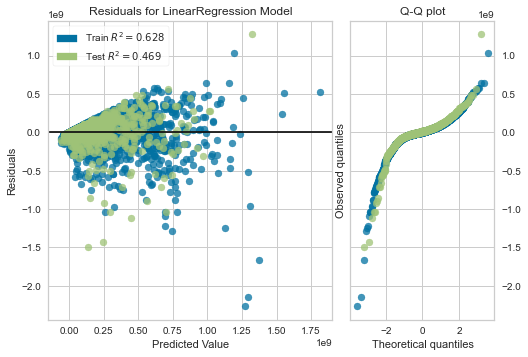

In [120]:
from yellowbrick.regressor import ResidualsPlot

# visualising the resididuals
visualizer = ResidualsPlot(linear_regression, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()

plt.show()

The models coefficient of determination (R^2) is 0.612, which is moderate and can be interpreted as statistically significant. A study [22] which has performed linear regression with the purpose of answering this exact question has developed a model with a coefficient of determination of 0.647, which is slightly above my own. This shows that my scraped dataset sample is representative of the population and the linear regression model is robust.

This QQ plot shows us that there are extremities in our dataset towards the upper quantiles of our dataset. We can also discern from this plot that our dataset is skewed, of which we are aware.

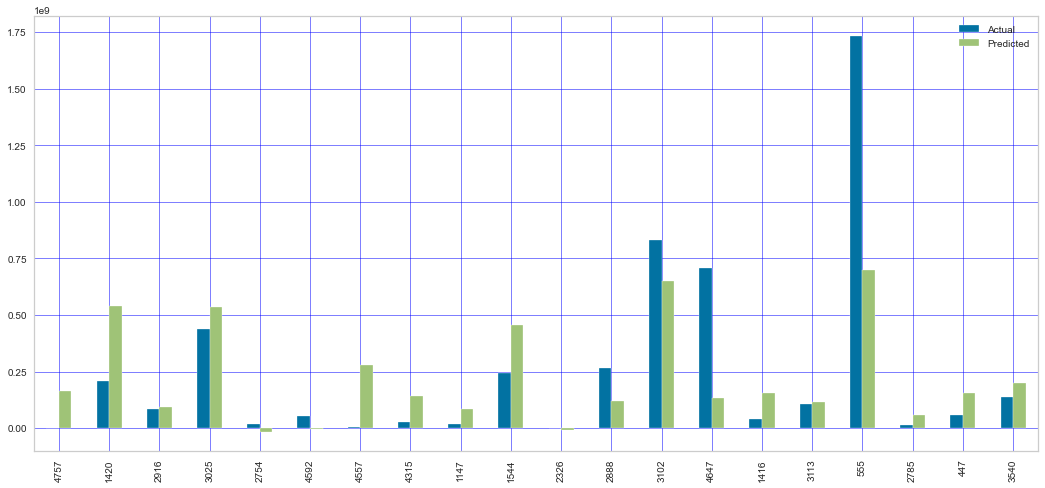

In [123]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

results_df = results_df.head(20)


results_df.plot(kind='bar',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='green')

plt.show()

In [124]:
import statsmodels.api as sm

# assigning the dependant variables
X = movies_df[['year', 'votes', 'budget', 'metascore']]

X = sm.add_constant(X)

# assigning the independant variable
y = movies_df['box_office']

# partitioning into test and train chunks
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# creating and fitting the data to the basic model
model = sm.OLS(y,X)
results = model.fit()
results.params

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             box_office   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     1942.
Date:                Mon, 06 Sep 2021   Prob (F-statistic):               0.00
Time:                        08:00:09   Log-Likelihood:                -96204.
No. Observations:                4802   AIC:                         1.924e+05
Df Residuals:                    4797   BIC:                         1.925e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.774e+08   2.75e+08     -1.008      0.3

## Conclusion

The purpose of this report was to examine and discern which of the many variables and features of the scraped IMDB movies dataset  was statistically significant in influencing the box office revenue.

The most significant contributor to the box office return is the budget. This is noticiable in the high correlation between it and revenue on the whole dataset but also very prevelant when examining the yearly budget and box office returns which showed an almost one to one linearly positive realtionship. as is typical however there were anomilies whereby lower budget movies performed well at the box office. 

I was however unsuccessful in classifying the dataset into bins denoting the success of the movie. A binary model would have fared better in my opinion, however due to time constraints it was not produced. 

On a positive note the linear regression model has shown promise with a decent R^2 value which can be further improved by the use of weights to denoted the key variables such as the budget.

Lastly the pre-trained Keras model for movie predictions was also a success, denoting the effectivenss of trained models to be used in a comercial sense, such as movie recommendations for Netflix.

## Limitations

Admittedly, this report has limitations. The first and most obvious one is the number of movies per genre within this dataset. The action and comedy genres are overly represented while other genres such as musical had to be excluded form study due to insufficient data. A work around would have been to scrape more movies from those specific genres and add them to this sample, unfortunetly this was not conducted due to the time constraint inplace.

Another crucial limitation is that the report is based upon and focused on the box office return and not the profit generated. However even with a focus on the net profit generated there would be another limitation in that movies also often gain a significant amount of revenue through DVD sales or online purchases, two variables which would be very difficult to maintain years after a movie has released.

A final limitation is that I dd not weigh the individual variables for linear regression, which should have been used given their large coefficients as visible from the regression model. I believe that the budget should have the highest weighting given that it is the best predictor for box office success.

## Justification for Tools Used

Throughout this coursework I have relied heavily upon the pandas library to manipulate and reshape data as required. From my understanding of python I did not see any alternative for pandas in its efficiency and efficacy. Oher alternatives to pandas are numpy, PySpark and R with the later 2 not able to be used in Jupyter notebook and as such not a viable option. 

Seaborn is another highly useful and heavily employed library in this report for a variety of reasons. Seaborn is integrated to work seamlessly with pandas, which is crucial given that I relied heavily upon it. Seaborn also provides a large number of additional tools and visualisation patterns which are key in infering ideas and conclusions from your data. Lastly seaborn is statistically based and naturally a good fit for this report given the large number of numerical features present in the data. While it was possible to use matplotlib for this report I feel that the linear regression grapsh in particular helped me clearly and quickly understand the meaning behid the data, something which would not be as easily reproduced in matplotlib.

Unittests were used sparingly in this report to test the dataframe for correct data types. Instead of unittests there was the option to use pytests which from my reading and understanding would have been easier to implement, according to this article 'Python Unittest Vs Pytest: Choose the Best' [23].

## References

[1] Papanaga, S., 2021. What is the key defining attribute of a successful movie?. Goldsmiths, Univeristy of London.

[2] Medium. 2021. Detecting And Treating Outliers In Python — Part 1. [online] Available at: <https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755> [Accessed 26 August 2021].

[3] Moffitt, C., 2021. Binning Data with Pandas qcut and cut - Practical Business Python. [online] Pbpython.com. Available at: <https://pbpython.com/pandas-qcut-cut.html#:~:text=The%20bins%20have%20a%20distribution%20of%2012%2C%205%2C,is%20the%20essential%20difference%20between%20cut%20and%20qcut.> [Accessed 30 August 2021].

[4] Medium. 2021. Detecting And Treating Outliers In Python — Part 1. [online] Available at: <https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755> [Accessed 26 August 2021].

[5] Medium. 2021. Understanding Boxplots. [online] Available at: <https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51> [Accessed 26 August 2021].

[6] Medium. 2021. Detecting And Treating Outliers In Python — Part 1. [online] Available at: <https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755> [Accessed 26 August 2021].

[7] Medium. 2021. 4 Reasons why Correlation does NOT imply Causation. [online] Available at: <https://towardsdatascience.com/4-reasons-why-correlation-does-not-imply-causation-f202f69fe979> [Accessed 3 September 2021].

[8] Frost, J., 2021. When Do You Need to Standardize the Variables in a Regression Model? - Statistics By Jim. [online] Statistics By Jim. Available at: <https://statisticsbyjim.com/regression/standardize-variables-regression/> [Accessed 3 September 2021].

[9] Medium. 2021. Detecting And Treating Outliers In Python — Part 1. [online] Available at: <https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755> [Accessed 26 August 2021].

[10] W. Chen, A., 2018. A Statistical Analysis of Gross Revenue in Movie Industry. International Journal of Business Management and Economic Research(IJBMER), [online] Vol 9(3). Available at: <http://www.ijbmer.com/docs/volumes/vol9issue3/ijbmer2018090303.pdf> [Accessed 30 August 2021].

[11] Antipov, E. and Pokryshevskaya, E., 2016. How to Measure the Power of Actors and Film Directors?. Empirical Studies of the Arts, 34(2), pp.147-159.

[12] SIMONTON, D., 2005. Cinematic Creativity and Production Budgets: Does Money Make the Movie?. The Journal of Creative Behavior, 39(1), pp.1-15.

[13] Basuroy, S., Chatterjee, S. and Ravid, S., 2003. How Critical are Critical Reviews? The Box Office Effects of Film Critics, Star Power, and Budgets. Journal of Marketing, 67(4), pp.103-117.

[14] Statista. 2021. Movie genres by total box office revenue in North America 2021 | Statista. [online] Available at: <https://www.statista.com/statistics/188658/movie-genres-in-north-america-by-box-office-revenue-since-1995/> [Accessed 3 September 2021].


[15] Pangarker, N. and Smit, E., 2013. The determinants of box office performance in the film industry revisited. South African Journal of Business Management, 44(3), pp.47-58.

[16] Karniouchina, E., 2011. Impact of star and movie buzz on motion picture distribution and box office revenue. International Journal of Research in Marketing, 28(1), pp.62-74.

[17] Wasserman, M., Mukherjee, S., Scott, K., Zeng, X., Radicchi, F. and Amaral, L., 2014. Correlations between user voting data, budget, and box office for films in the internet movie database. Journal of the Association for Information Science and Technology, 66(4), pp.858-868.

[18] Team, K., 2021. Keras documentation: Collaborative Filtering for Movie Recommendations. [online] Keras.io. Available at: <https://keras.io/examples/structured_data/collaborative_filtering_movielens/> [Accessed 5 September 2021].

[19] Multicollinearity in Regression Analysis: Problems, Detection, and Solutions - Statistics By Jim
https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

[20] Nast, C., 2021. You should ignore film ratings on IMDb and Rotten Tomatoes. [online] WIRED UK. Available at: <https://www.wired.co.uk/article/which-film-ranking-site-should-i-trust-rotten-tomatoes-imdb-metacritic> [Accessed 4 September 2021].

[21] Frost, J., 2021. When Do You Need to Standardize the Variables in a Regression Model? - Statistics By Jim. [online] Statistics By Jim. Available at: <https://statisticsbyjim.com/regression/standardize-variables-regression/> [Accessed 3 September 2021].

[22] Pangarker, N. and Smit, E., 2013. The determinants of box office performance in the film industry revisited. South African Journal of Business Management, 44(3), pp.47-58.

[23] Python Pool. 2021. Python Unittest Vs Pytest: Choose the Best. [online] Available at: <https://www.pythonpool.com/python-unittest-vs-pytest/> [Accessed 5 September 2021].